### Лабораторная Работа номер 2:  Приближённое  решение уравнения  вида  f(x) = 0  итерационными  методами:  простой итерации, секущих и касательных (комбинированный метод). Вариант 19:   $ 2*sin(x + 0.5) = 1.5 - x $


### I. Вывод всех возможных функций из уравнения $ 2*sin(x + 0.5) = 1.5 - x $ для метода простой итерации:


### Вариант 1: $ x = 1.5 - 2 \sin(x + 0.5) $


### Вариант 2: $ x = \arcsin\left(\frac{1.5 - x}{2}\right) - 0.5 $
1. Начнем с исходного уравнения:
   $  2 \sin(x + 0.5) = 1.5 - x  $
2. Разделим обе части уравнения на 2:
   $ sin(x + 0.5) = \frac{1.5 - x}{2} $
3. Возьмем арксинус от обеих частей уравнения:
   $ x + 0.5 = \arcsin\left(\frac{1.5 - x}{2}\right) $
4. Вычтем 0.5 из обеих частей уравнения:
   $ x = \arcsin\left(\frac{1.5 - x}{2}\right) - 0.5 $


### Вариант 3: $ x = \frac{1.5 - 2 \sin(x + 0.5)}{2} $
1. Начнем с исходного уравнения:
   $ 2 \sin(x + 0.5) = 1.5 - x $
2. Выразим \(x\) из правой части уравнения:
   $ x = 1.5 - 2 \sin(x + 0.5) $
3. Разделим обе части уравнения на 2:
   $ x = \frac{1.5 - 2 \sin(x + 0.5)}{2} $


P:\pmr231\AppData\Local\temp\282\ipykernel_380136\3101557155.py:12: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin((1.5 - x) / 2) - 0.5


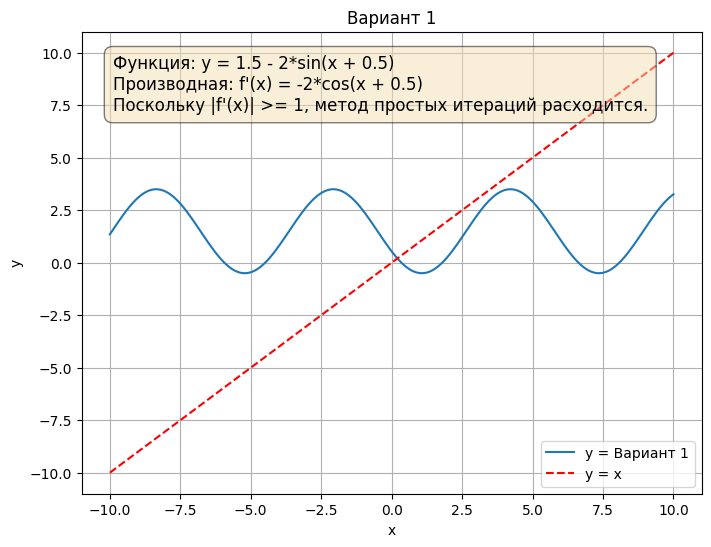

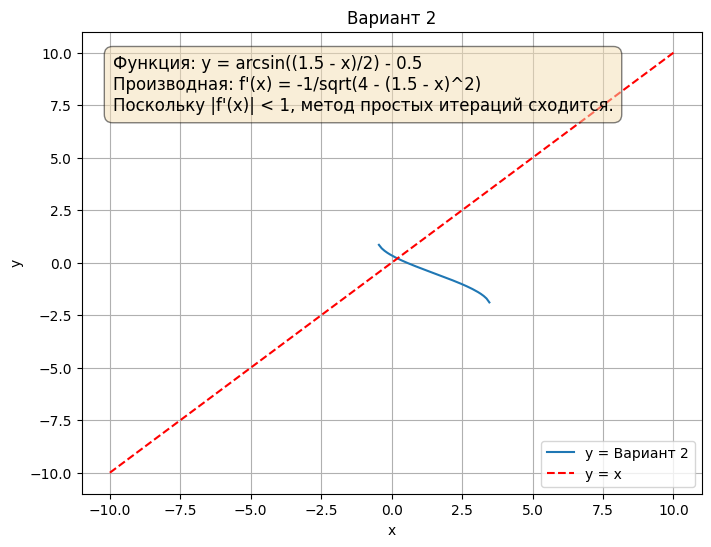

Итерация   Корень          Новый Корень    |X(n)-X(n-1)|  
0          0.02360         0.47640         0.47640        
1          0.33040         0.30680         0.30680        
2          0.12463         0.20576         0.20576        
3          0.25829         0.13366         0.13366        
4          0.16983         0.08846         0.08846        
5          0.22761         0.05778         0.05778        
6          0.18956         0.03805         0.03805        
7          0.21447         0.02492         0.02492        
8          0.19810         0.01638         0.01638        
9          0.20884         0.01074         0.01074        
10         0.20179         0.00705         0.00705        
11         0.20641         0.00463         0.00463        
12         0.20337         0.00304         0.00304        
13         0.20537         0.00199         0.00199        
14         0.20406         0.00131         0.00131        
15         0.20492         0.00086         0.00086      

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from math import fabs

def variant_1(x):
    """Вариант 1: x = 1.5 - 2*sin(x + 0.5)"""
    return 1.5 - 2 * np.sin(x + 0.5)

def variant_2(x):
    """Вариант 2: x = arcsin((1.5 - x)/2) - 0.5"""
    return np.arcsin((1.5 - x) / 2) - 0.5

def derivative_of_function(func, x):
    """Вычисляет приближенную производную функции в точке x."""
    h = 1e-7  # Малое смещение для численной производной
    return (func(x + h) - func(x - h)) / (2 * h)

def show_graphs_and_analyze():
    """
    Показывает графики функций и анализирует сходимость.
    """
    for i, func in enumerate([variant_1, variant_2]):
        title = f"Вариант {i+1}"
        x_values = np.linspace(-10, 10, 200)
        y_values = func(x_values)

        fig, ax = plt.subplots(figsize=(8, 6))
        ax.plot(x_values, y_values, label=f'y = {title}')
        ax.plot(x_values, x_values, 'r--', label='y = x')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend()
        ax.grid(True)
        ax.set_title(title)

        # Проверка сходимости
        root = fsolve(lambda x: func(x) - x, 0)[0]
        explanation = ""
        if title == "Вариант 1":
            explanation = f"Функция: y = 1.5 - 2*sin(x + 0.5)\n"
            explanation += f"Производная: f'(x) = -2*cos(x + 0.5)\n"
        elif title == "Вариант 2":
            explanation = f"Функция: y = arcsin((1.5 - x)/2) - 0.5\n"
            explanation += f"Производная: f'(x) = -1/sqrt(4 - (1.5 - x)^2)\n"
 

        slope_at_root = derivative_of_function(func, root)
        if fabs(slope_at_root) < 1:
            explanation += "Поскольку |f'(x)| < 1, метод простых итераций сходится."
        else:
            explanation += "Поскольку |f'(x)| >= 1, метод простых итераций расходится."

        ax.text(0.05, 0.95, explanation, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.5))

    plt.show()

def calculate_iteration(func, x_initial, tolerance, precision):
    """
    Выполняет метод простых итераций и возвращает результат.
    :param func: Функция для анализа
    :param x_initial: Начальная точка
    :param tolerance: Требуемая точность
    :param precision: Количество знаков после запятой для вывода
    :return: Конечное приближение корня
    """
    x_prev = x_initial
    iter_count = 0
    max_iterations = 100  # Увеличиваем максимальное количество итераций
    print(f"{'Итерация':<10} {'Корень':<15} {'Новый Корень':<15} {'|X(n)-X(n-1)|':<15}")
    print("=" * 55)
    while True:
        x_next = func(x_prev)
        error = fabs(x_next - x_prev)
        print(f"{iter_count:<10} {x_next:<15.{precision}f} {error:<15.{precision}f} {error:<15.{precision}f}")
        if error < tolerance:
            print("Метод сходится!")
            return x_next
        elif iter_count >= max_iterations:  # Проверка на расхождение
            print("Метод расходится!")
            return None
        x_prev = x_next
        iter_count += 1

def main():
    # Этап 1: Показываем графики и проводим предварительный анализ
    show_graphs_and_analyze()

    # Этап 2: Запрашиваем ввод данных от пользователя
    func_choice = int(input("Выберите вариант функции (1, 2 или 3): "))
    func_map = {
        1: variant_1,
        2: variant_2
    }
    selected_func = func_map.get(func_choice, None)
    if selected_func is None:
        print("Неправильный выбор функции.")
        return

    start_range = float(input("Введите начало диапазона: "))
    end_range = float(input("Введите конец диапазона: "))
    precision_str = input("Введите требуемую точность (например, 0.0001): ")
    precision = len(precision_str.split('.')[1]) + 1  # Определяем количество знаков после запятой
    tolerance = float(precision_str)  # Определяем точность исходя из введенного значения

    # Универсальное начальное приближение
    x_initial = (start_range + end_range) / 2

    # Выполнение метода простых итераций
    result = calculate_iteration(selected_func, x_initial, tolerance, precision)
    if result is not None:
        print(f"Конечное приближение корня: {result:.{precision}f}")
    else:
        print("Конечное приближение не найдено.")

if __name__ == "__main__":
    main()


## Метод хорд и касательных (комбинированный)

Начинаем комбинированный метод хорд и касательных:
Итерация 0: a = 0.483580, b = 4.817500, |b - a| = 4.333920


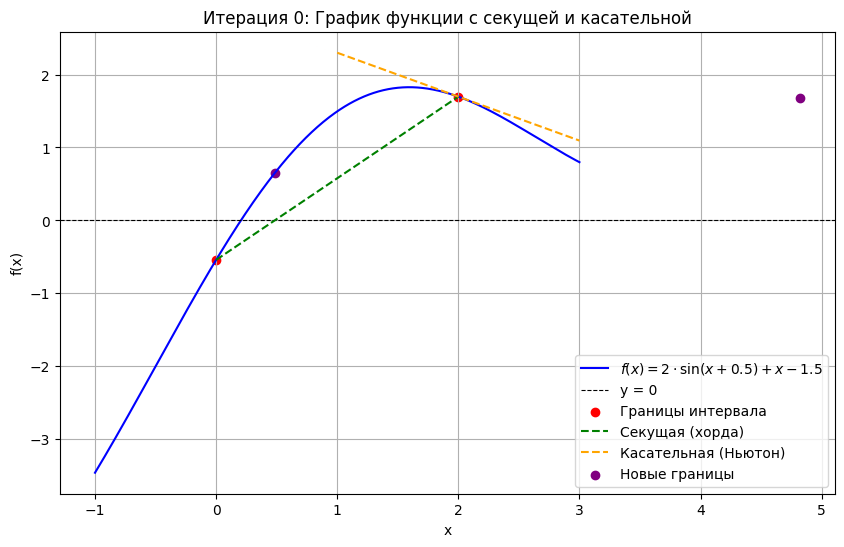

Итерация 1: a = -2.261134, b = 4.035062, |b - a| = 6.296196


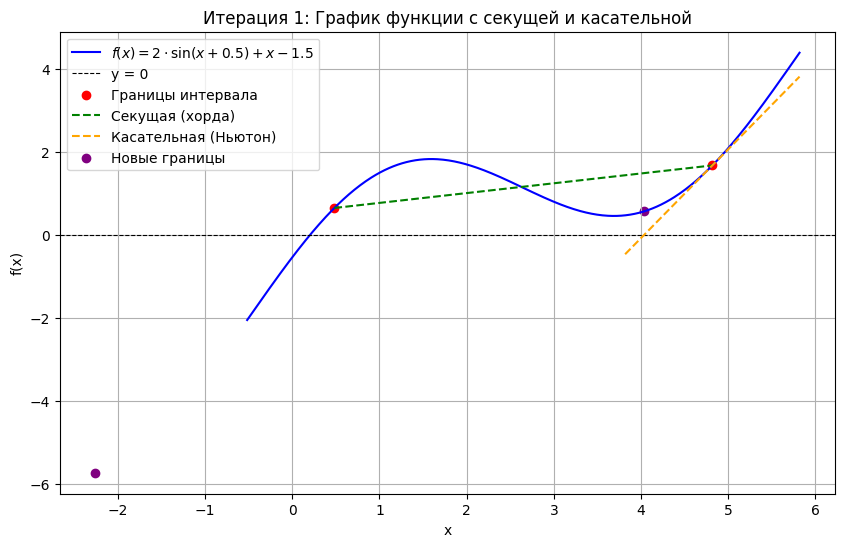

Итерация 2: a = 3.468209, b = 3.159873, |b - a| = 0.308336


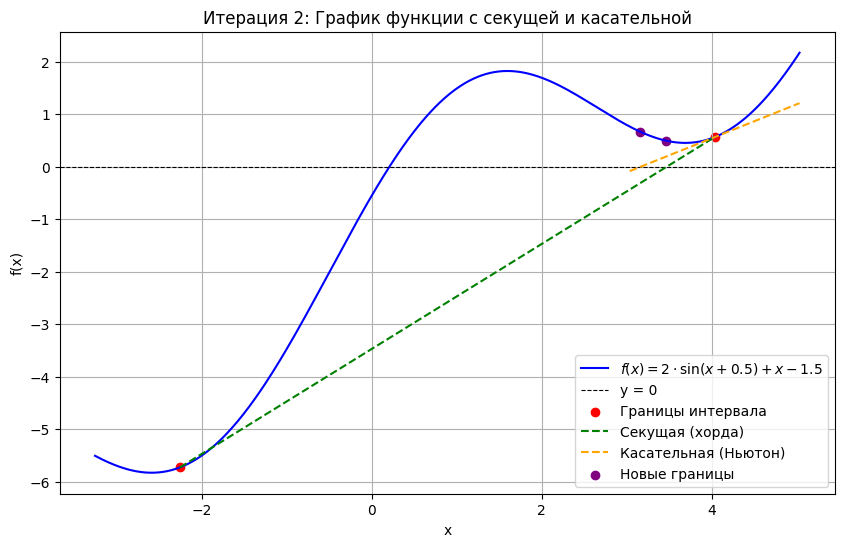

Итерация 3: a = 4.358101, b = 4.067317, |b - a| = 0.290784


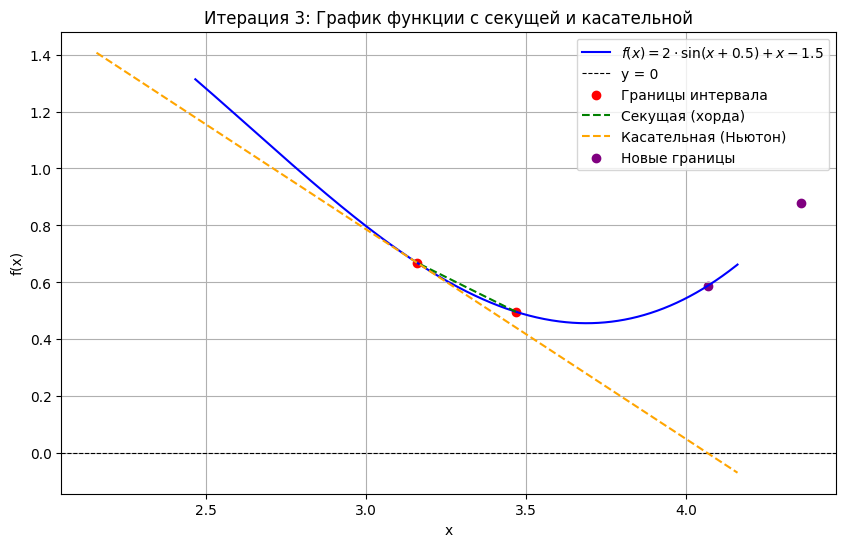

Итерация 4: a = 3.479366, b = 3.239706, |b - a| = 0.239660


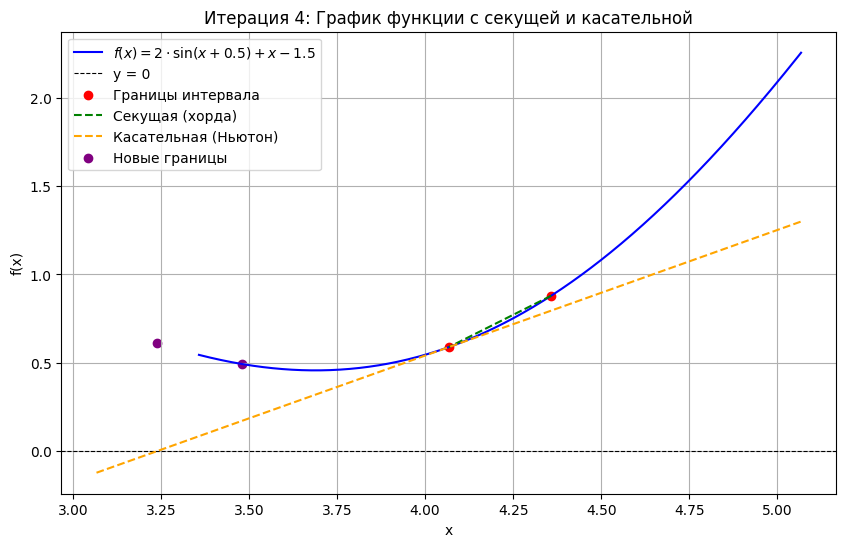

Итерация 5: a = 4.460146, b = 4.179563, |b - a| = 0.280583


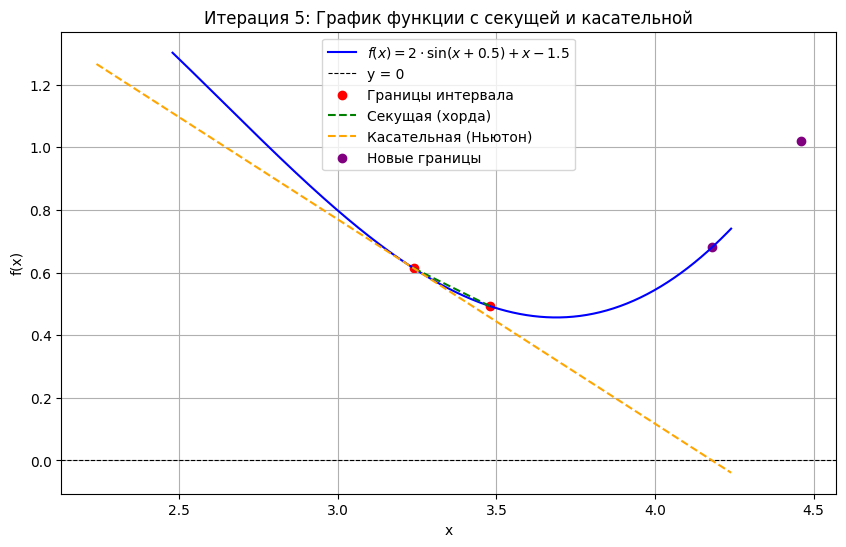

Итерация 6: a = 3.618818, b = 3.451106, |b - a| = 0.167712


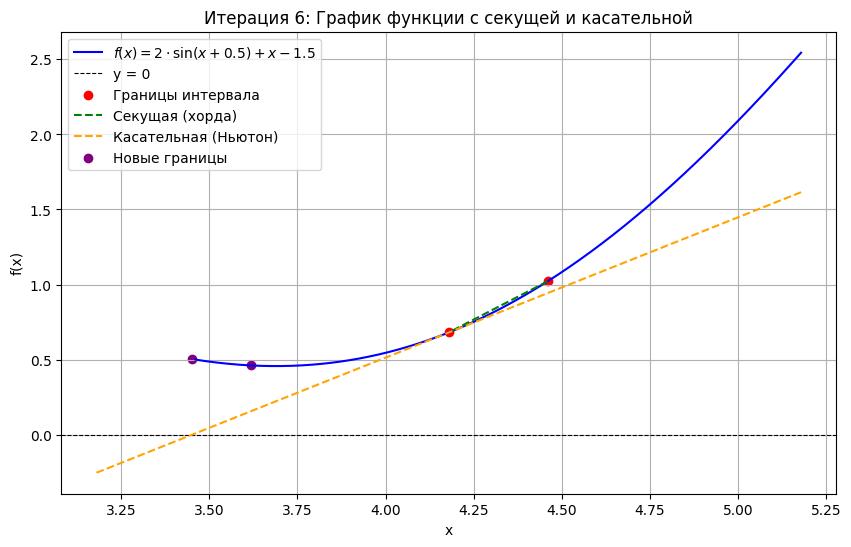

Итерация 7: a = 5.447056, b = 4.776365, |b - a| = 0.670691


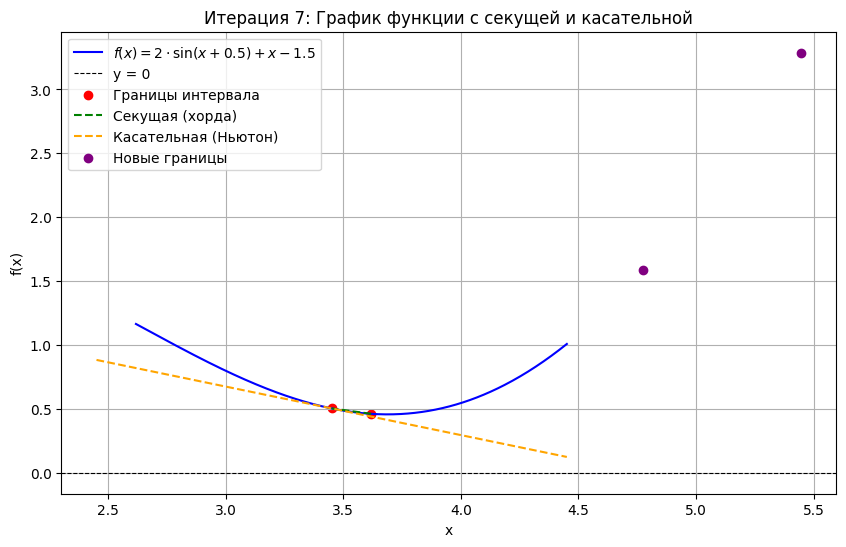

Итерация 8: a = 4.151089, b = 4.009804, |b - a| = 0.141285


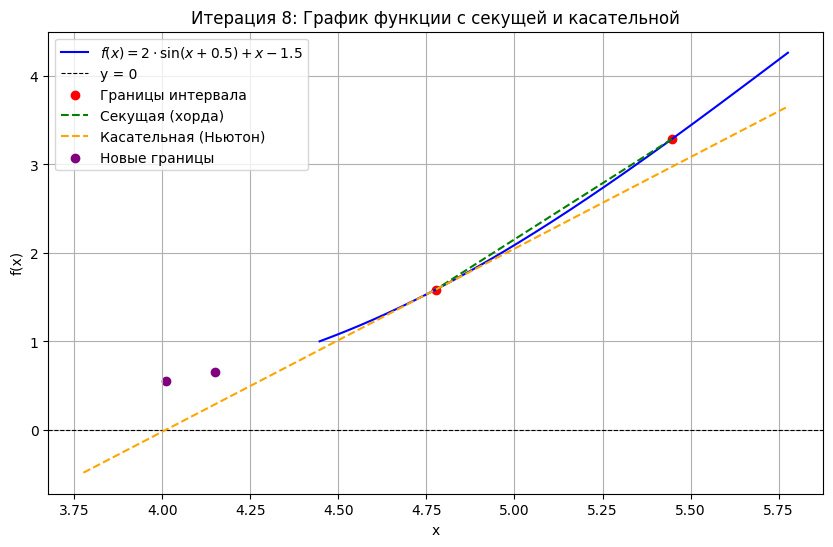

Итерация 9: a = 3.262680, b = 3.088271, |b - a| = 0.174409


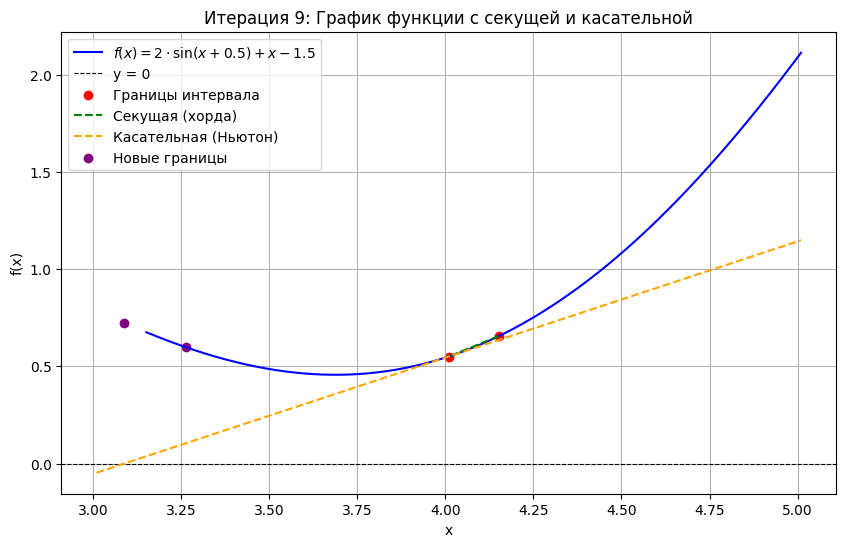

Итерация 10: a = 4.094987, b = 3.989428, |b - a| = 0.105559


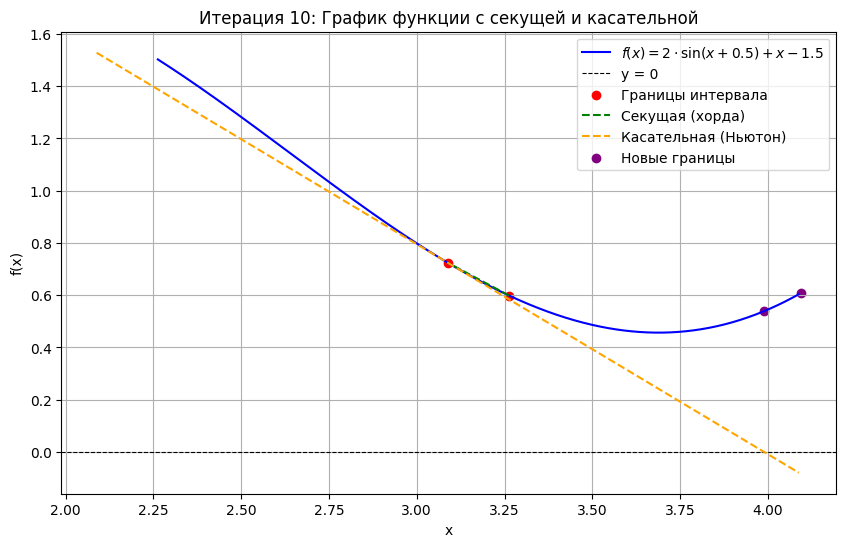

Итерация 11: a = 3.174633, b = 3.023188, |b - a| = 0.151446


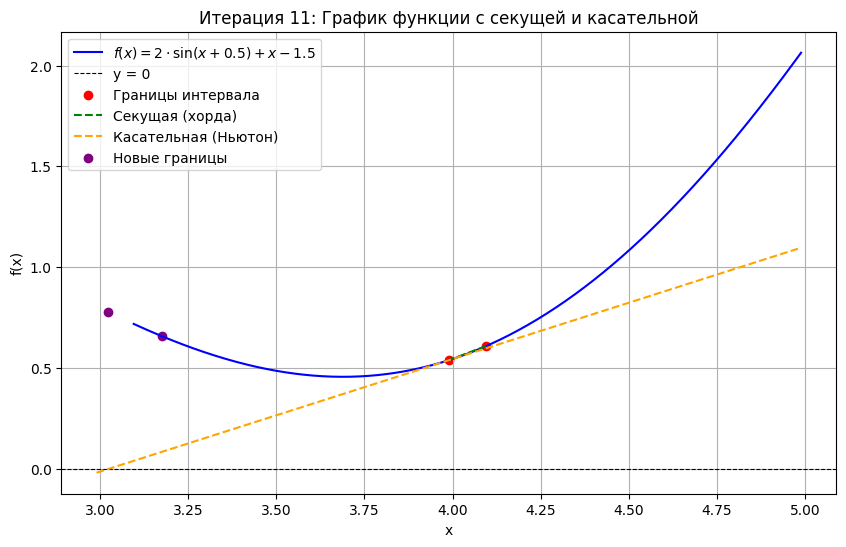

Итерация 12: a = 4.005048, b = 3.932364, |b - a| = 0.072685


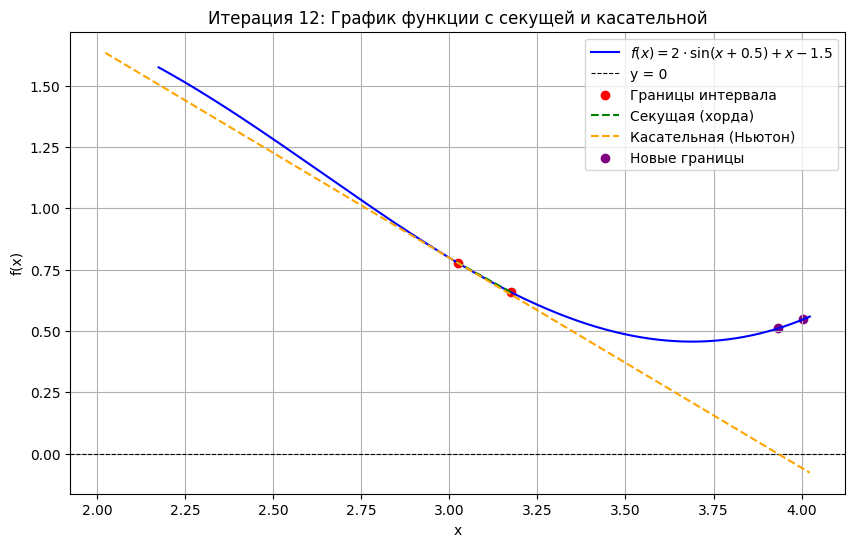

Итерация 13: a = 2.946434, b = 2.791439, |b - a| = 0.154995


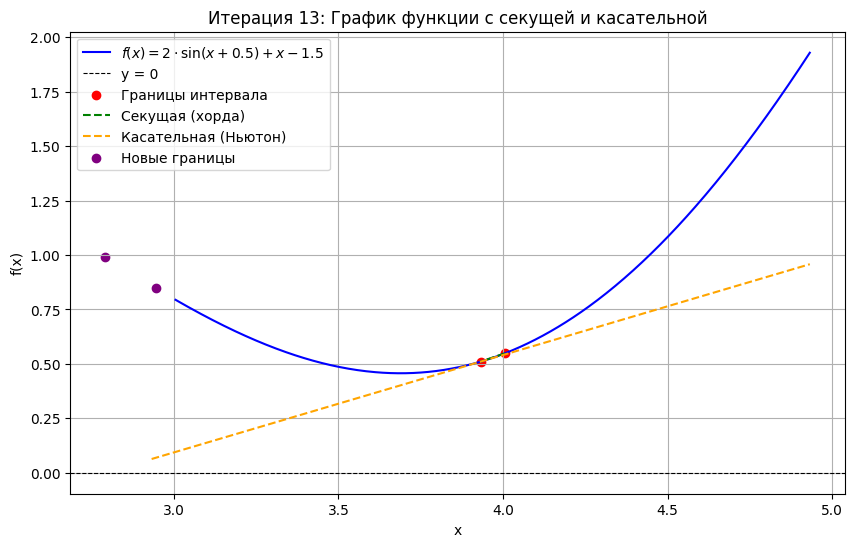

Итерация 14: a = 3.840330, b = 3.807068, |b - a| = 0.033262


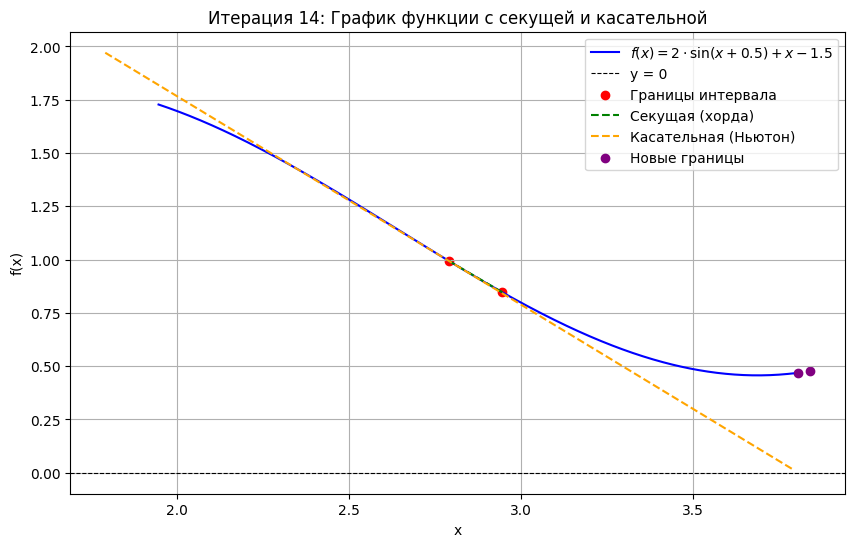

Итерация 15: a = 1.869228, b = 1.587685, |b - a| = 0.281543


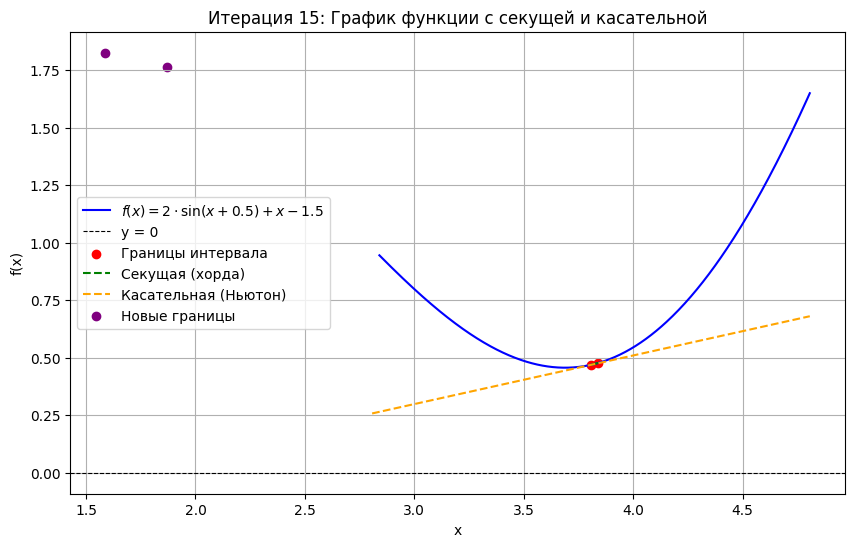

Итерация 16: a = 9.946554, b = -155.248413, |b - a| = 165.194967


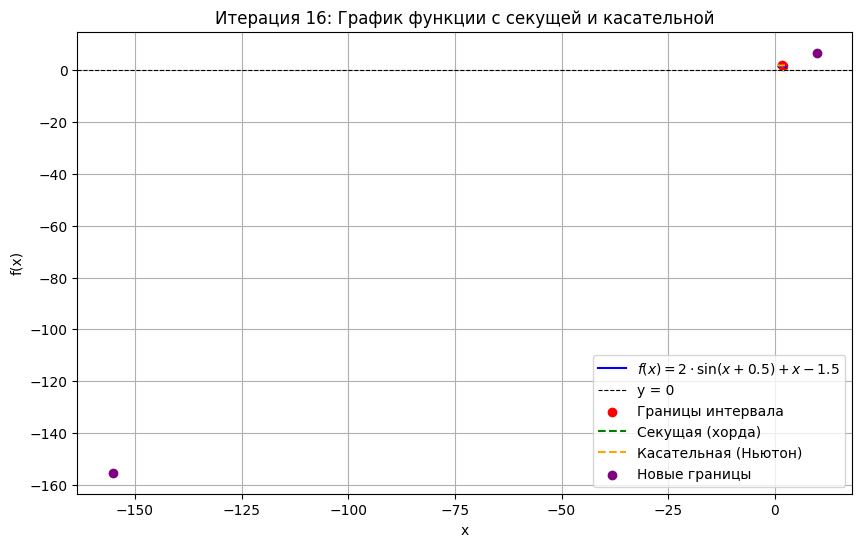

Итерация 17: a = 3.074825, b = -565.597455, |b - a| = 568.672281


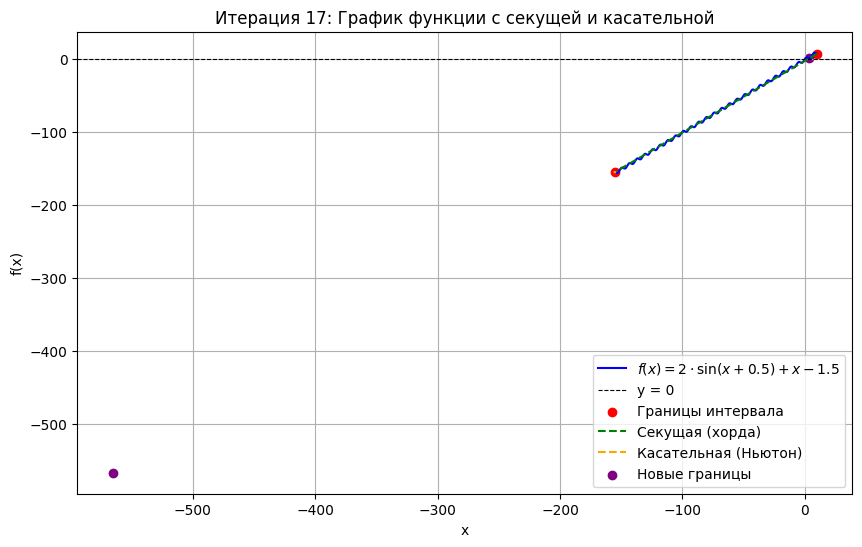

Итерация 18: a = 2.337542, b = -366.910679, |b - a| = 369.248221


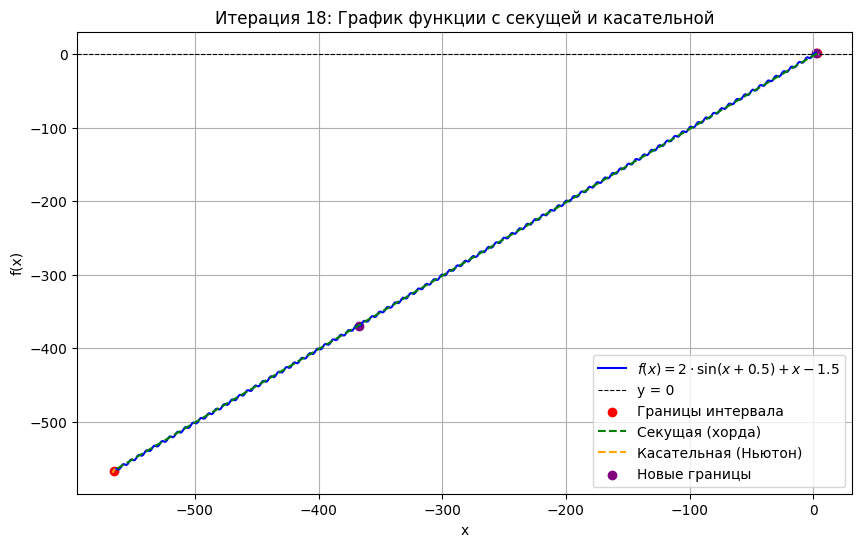

Итерация 19: a = 0.910611, b = 1547.733688, |b - a| = 1546.823077


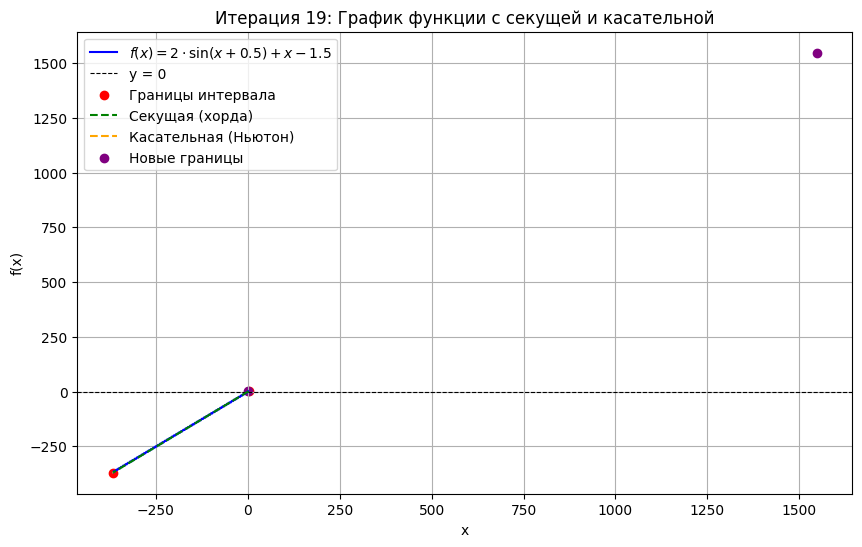

Итерация 20: a = -0.475195, b = 3815.888371, |b - a| = 3816.363567


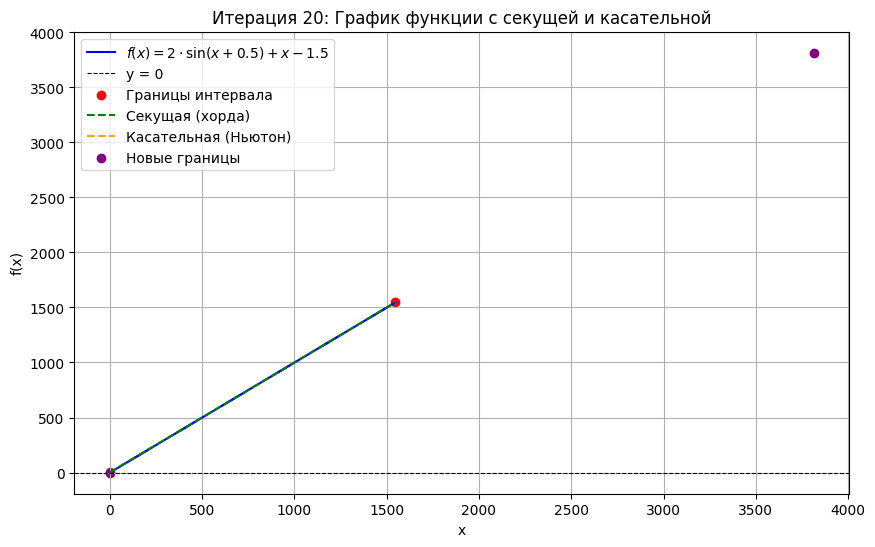

Итерация 21: a = 1.449812, b = 10216.280406, |b - a| = 10214.830594


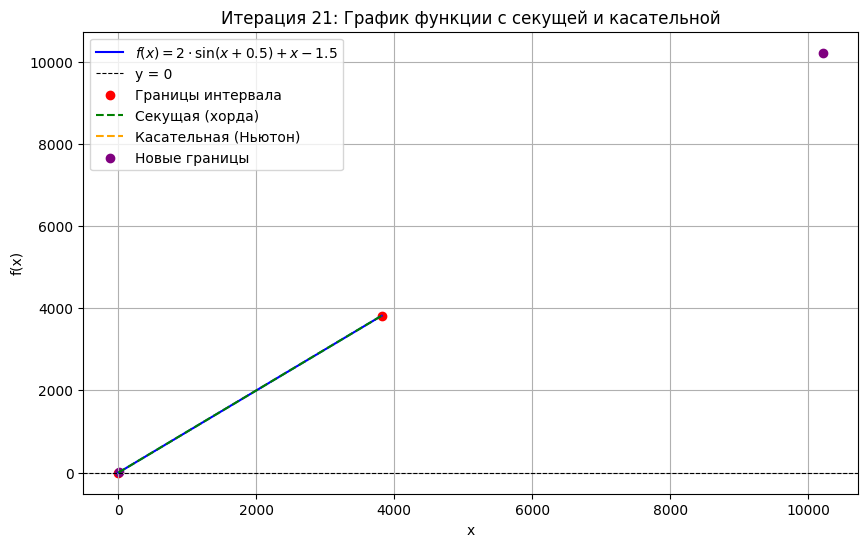

Итерация 22: a = -0.358275, b = 6691.025585, |b - a| = 6691.383861


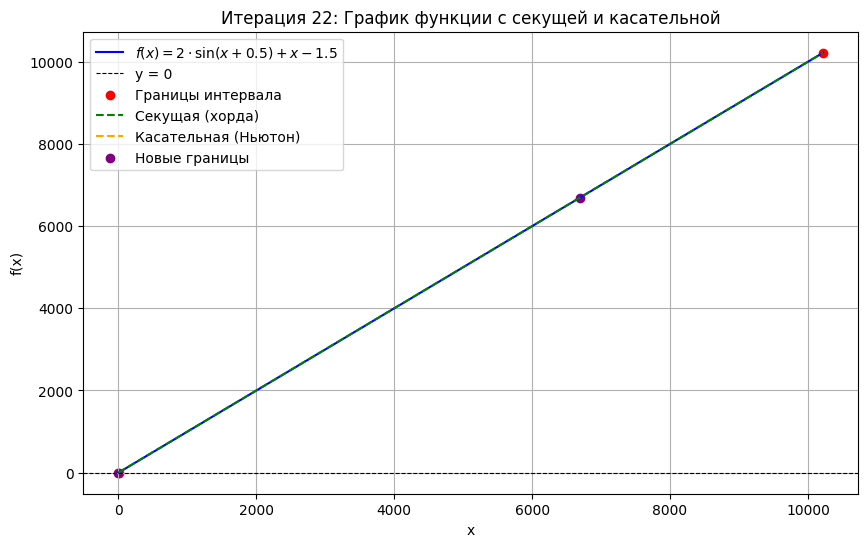

Итерация 23: a = 1.217597, b = 4457.911173, |b - a| = 4456.693576


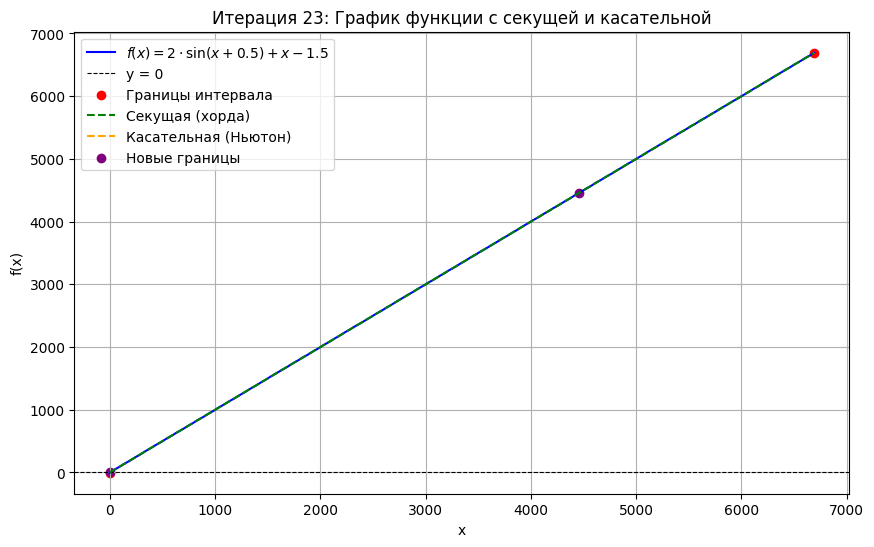

Итерация 24: a = -0.479601, b = 10293.208672, |b - a| = 10293.688273


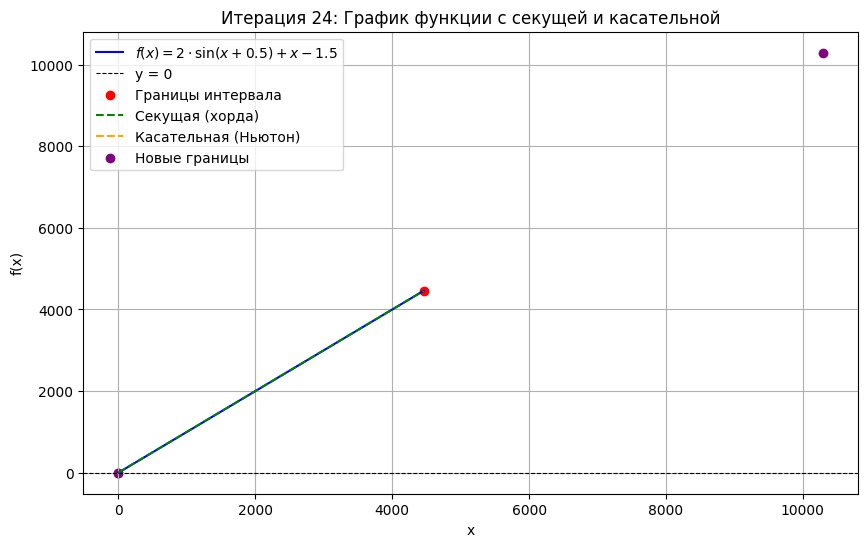

Итерация 25: a = 1.458851, b = -12754.136607, |b - a| = 12755.595458


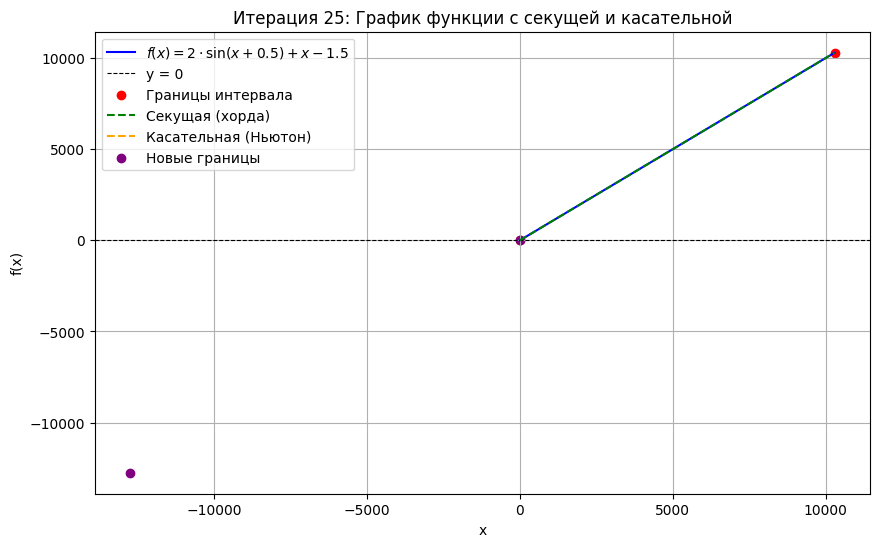

Итерация 26: a = -0.351299, b = -5113.925735, |b - a| = 5113.574436


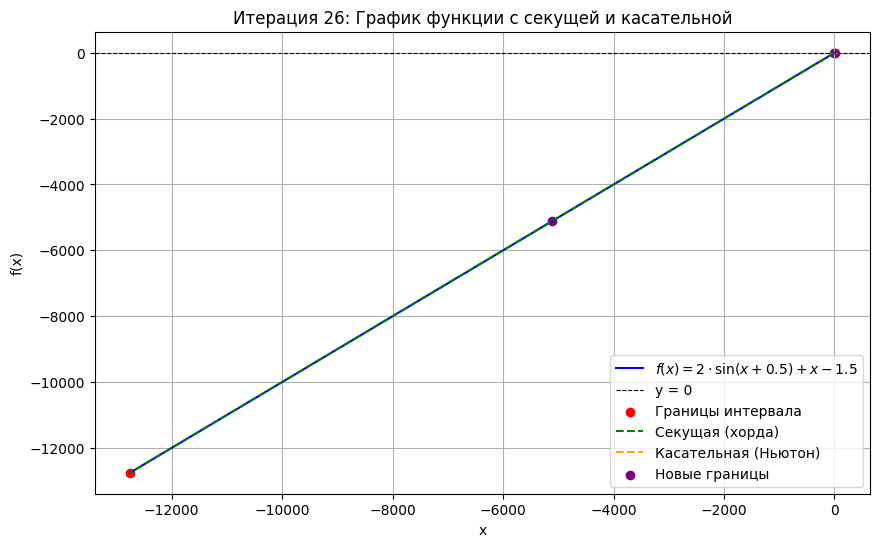

Итерация 27: a = 1.204141, b = -2464.500138, |b - a| = 2465.704279


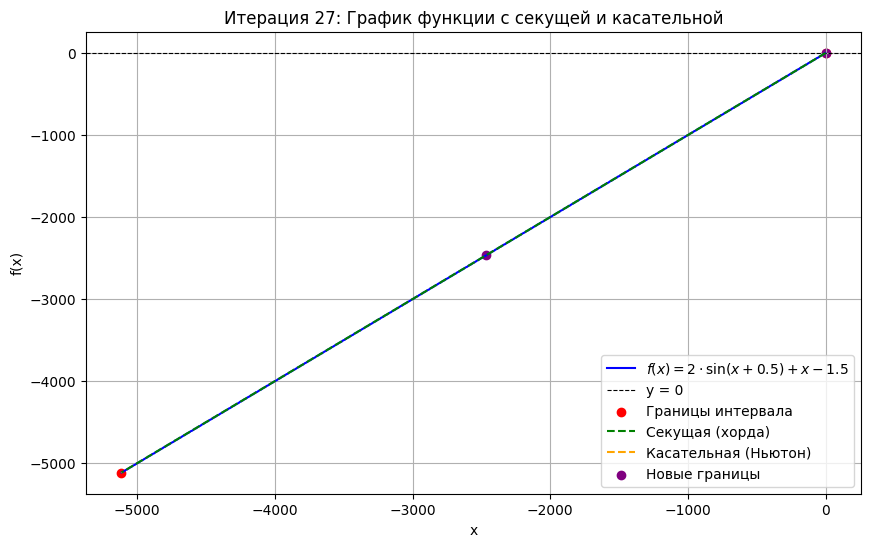

Итерация 28: a = -0.479749, b = -1286.542329, |b - a| = 1286.062580


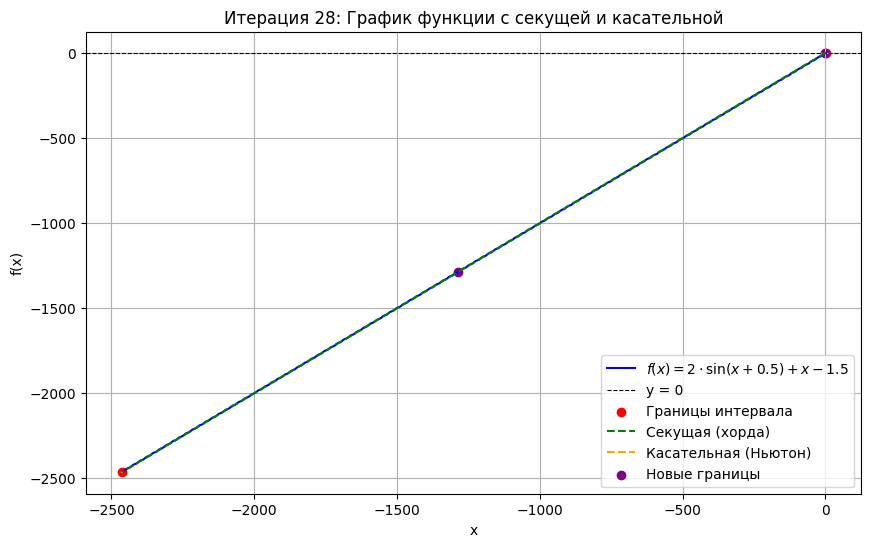

Итерация 29: a = 1.462172, b = 7382.575183, |b - a| = 7381.113011


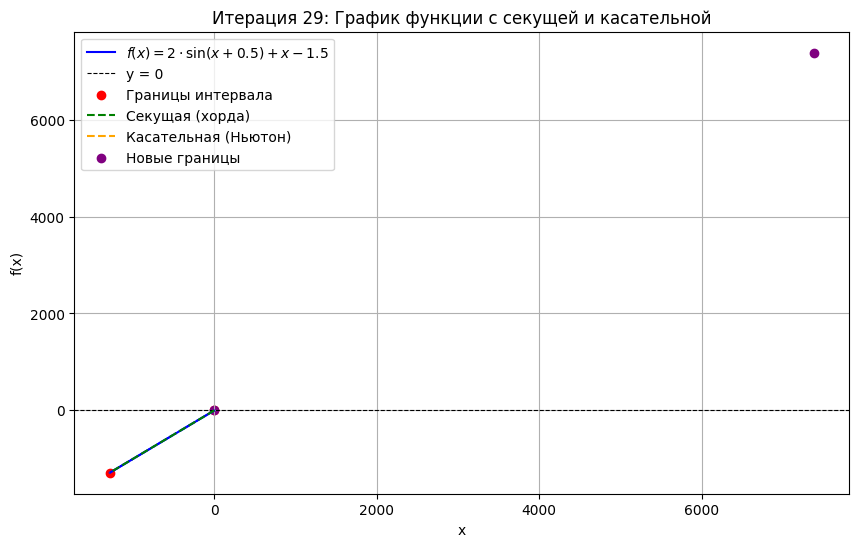

Итерация 30: a = -0.349064, b = 4828.779864, |b - a| = 4829.128928


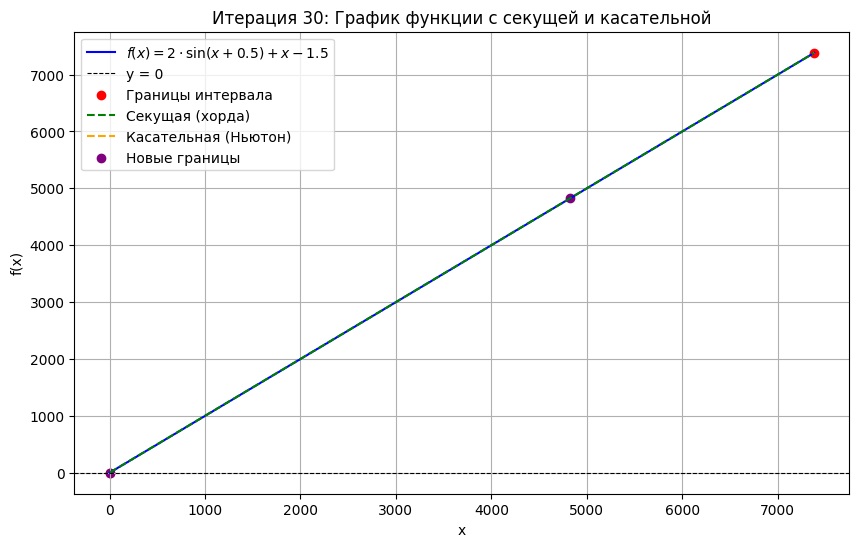

Итерация 31: a = 1.199759, b = 13011.353665, |b - a| = 13010.153906


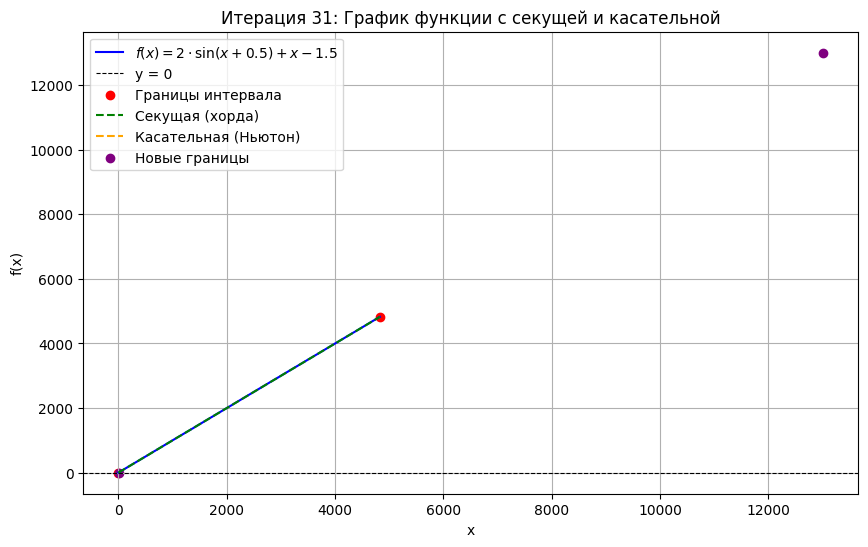

Итерация 32: a = -0.483799, b = 8054.038213, |b - a| = 8054.522013


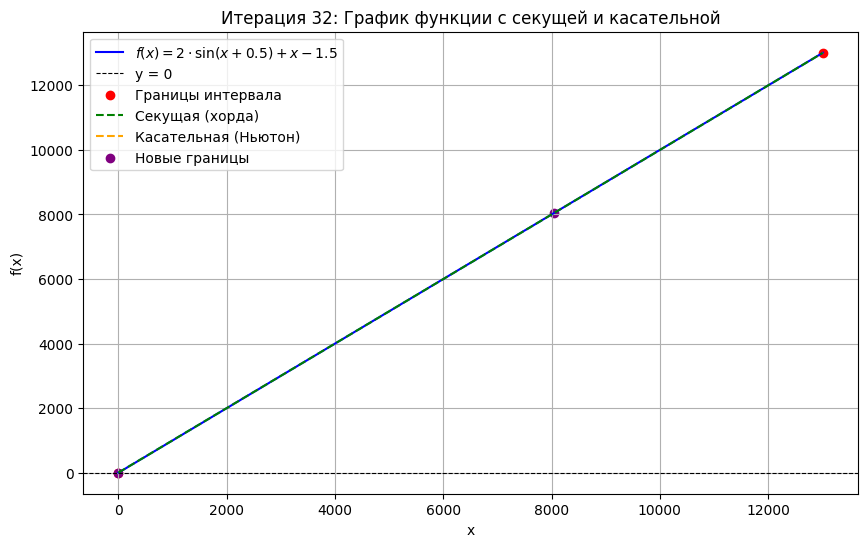

Итерация 33: a = 1.467843, b = 5126.205082, |b - a| = 5124.737240


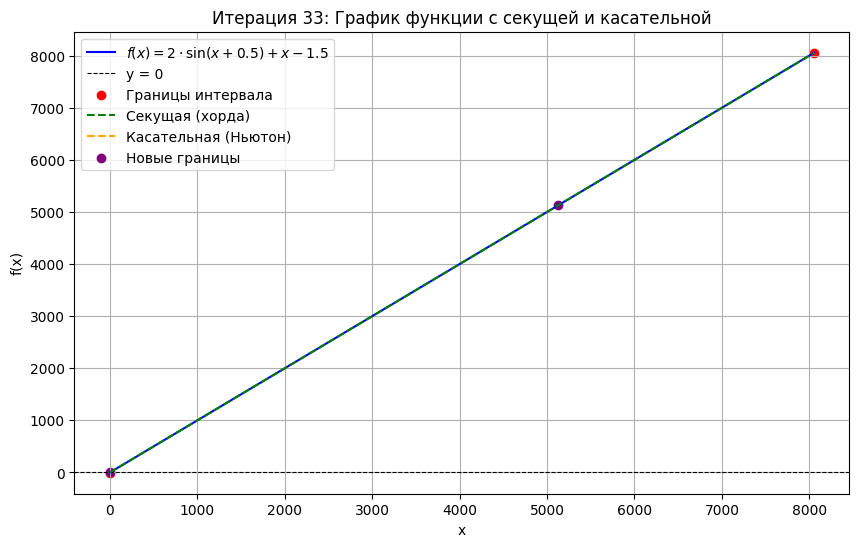

Итерация 34: a = -0.345325, b = 3335.640670, |b - a| = 3335.985996


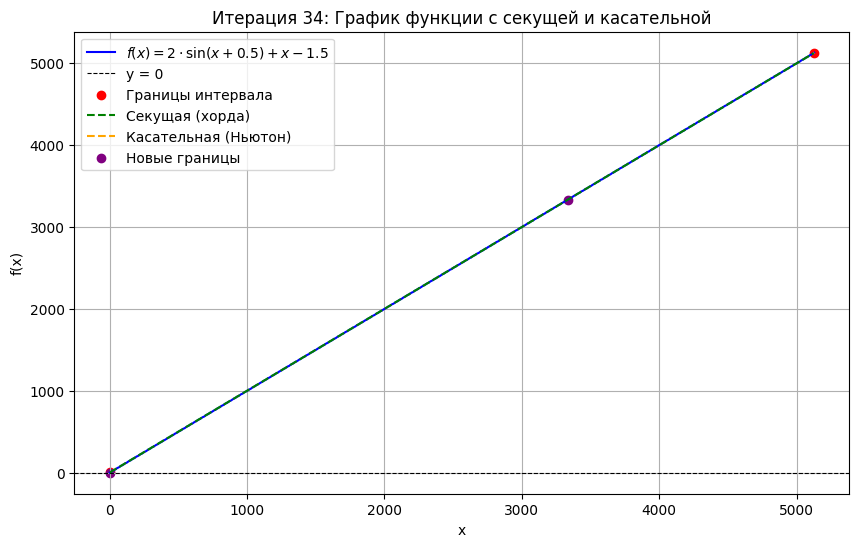

Итерация 35: a = 1.192236, b = 2204.428292, |b - a| = 2203.236056


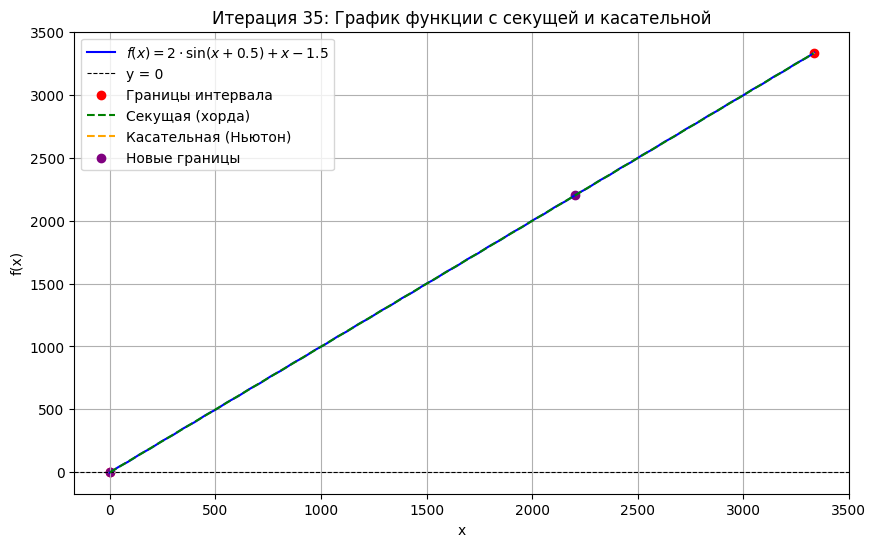

Итерация 36: a = -0.487474, b = 1413.290560, |b - a| = 1413.778034


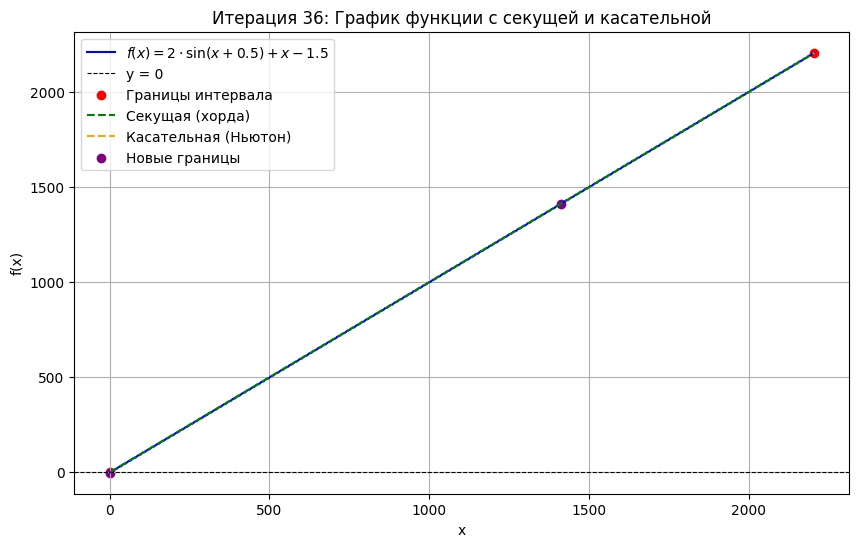

Итерация 37: a = 1.474779, b = 941.787368, |b - a| = 940.312589


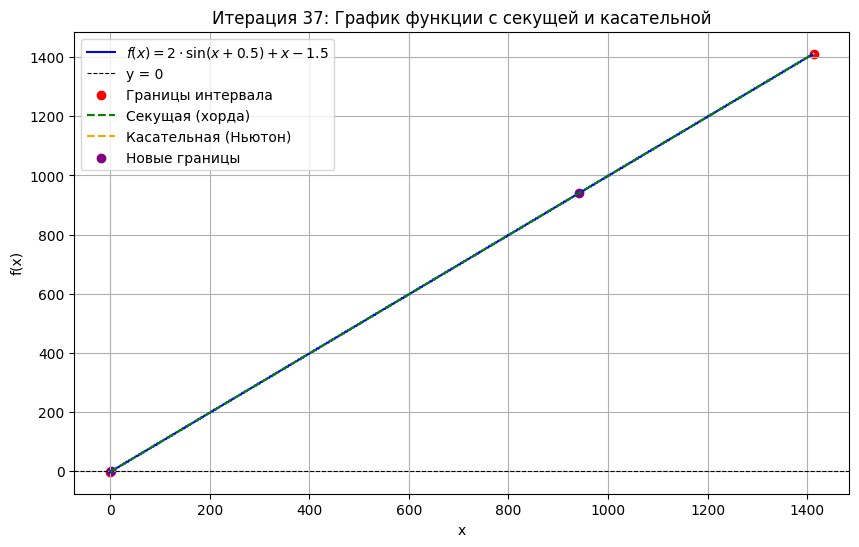

Итерация 38: a = -0.343293, b = 624.662717, |b - a| = 625.006009


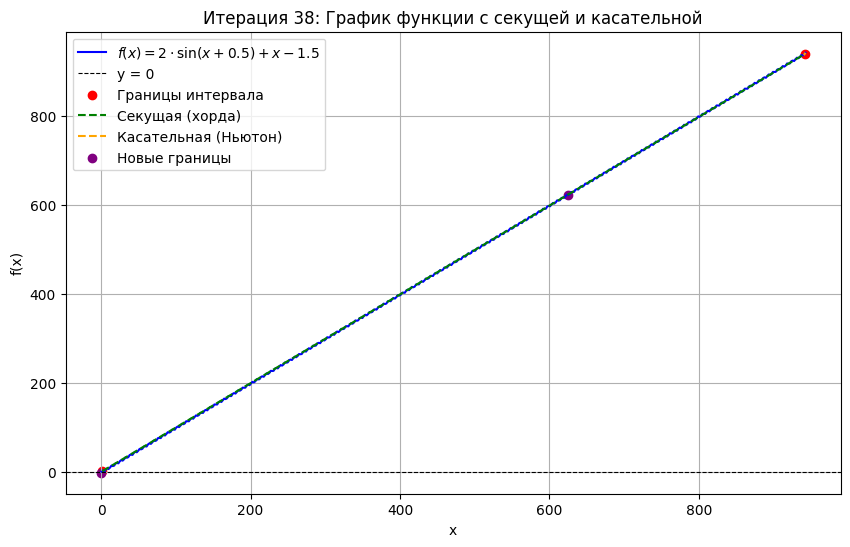

Итерация 39: a = 1.188562, b = 1247.979941, |b - a| = 1246.791378


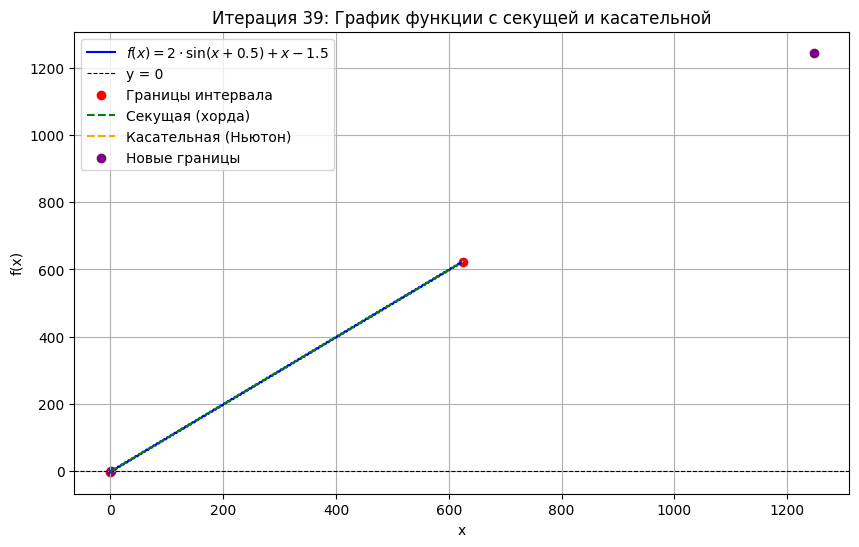

Итерация 40: a = -0.491395, b = -1840.556419, |b - a| = 1840.065024


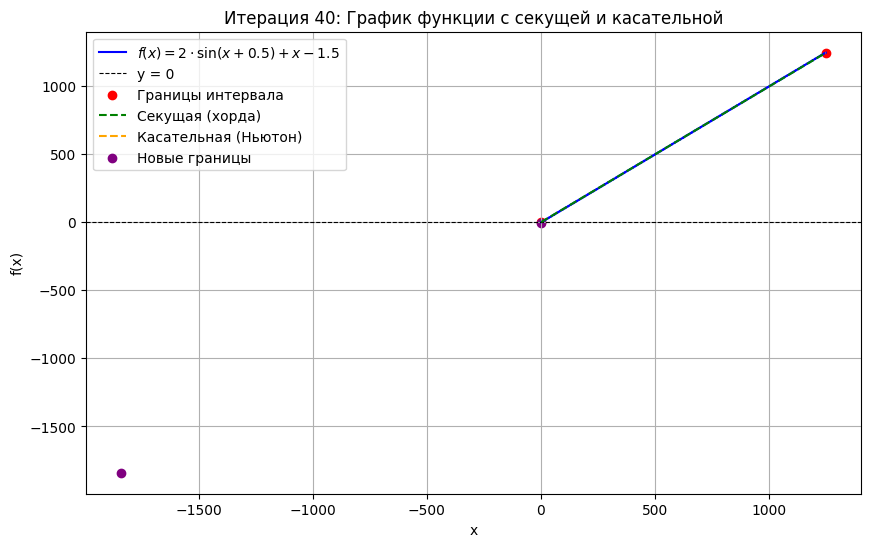

Итерация 41: a = 1.484477, b = -1010.246817, |b - a| = 1011.731294


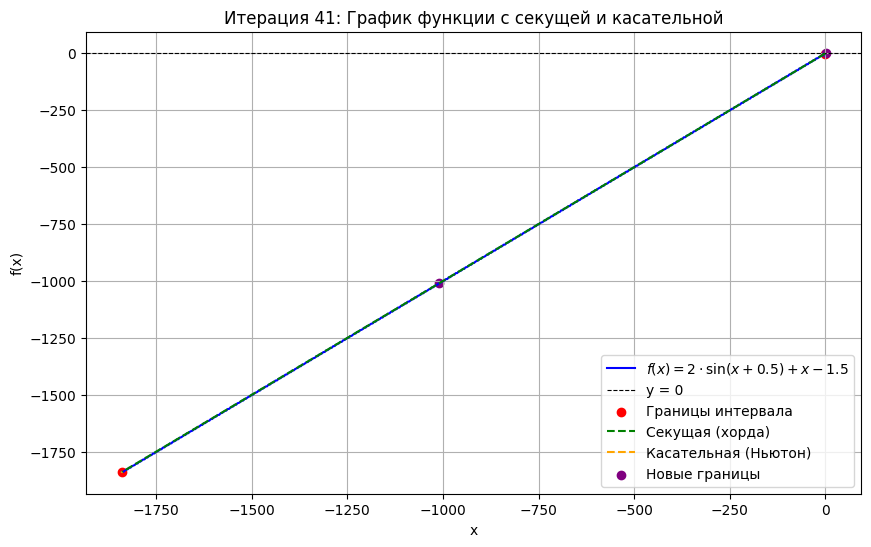

Итерация 42: a = -0.331463, b = 1201.940468, |b - a| = 1202.271931


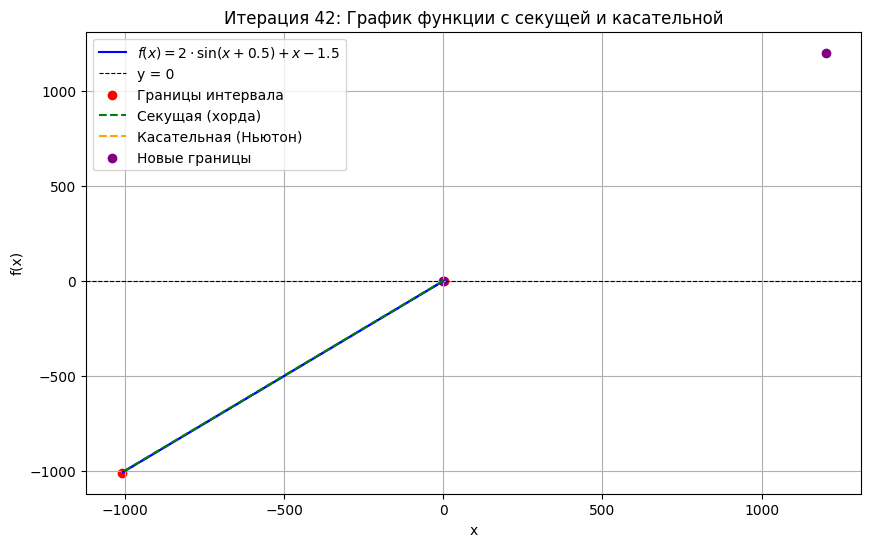

Итерация 43: a = 1.163171, b = 4144.970081, |b - a| = 4143.806910


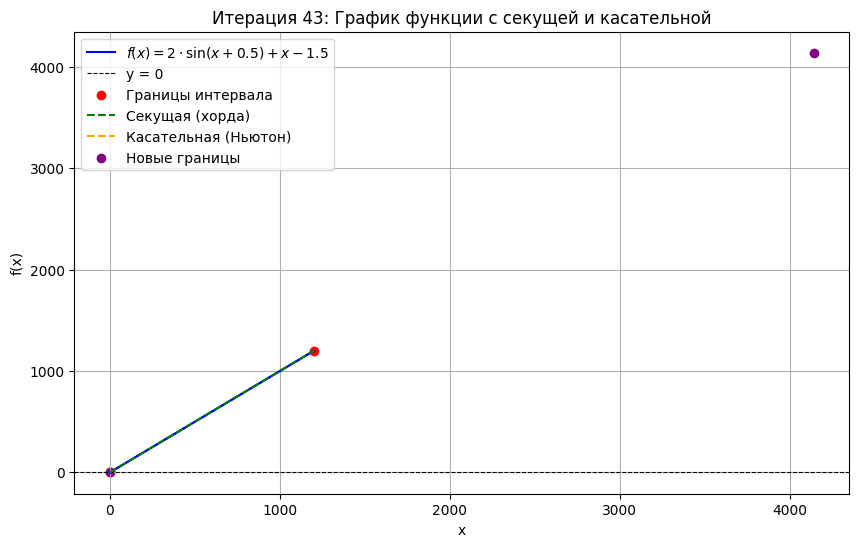

Итерация 44: a = -0.493061, b = 899.956302, |b - a| = 900.449363


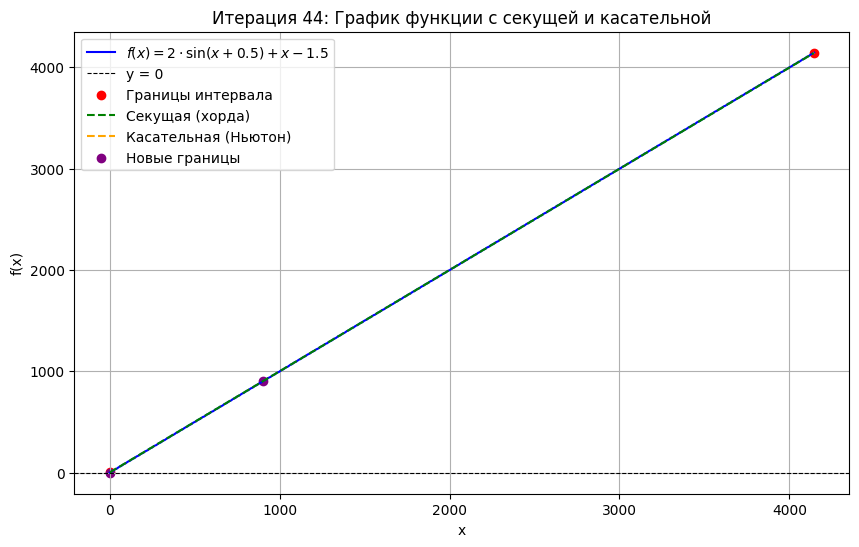

Итерация 45: a = 1.482094, b = -2857.410954, |b - a| = 2858.893048


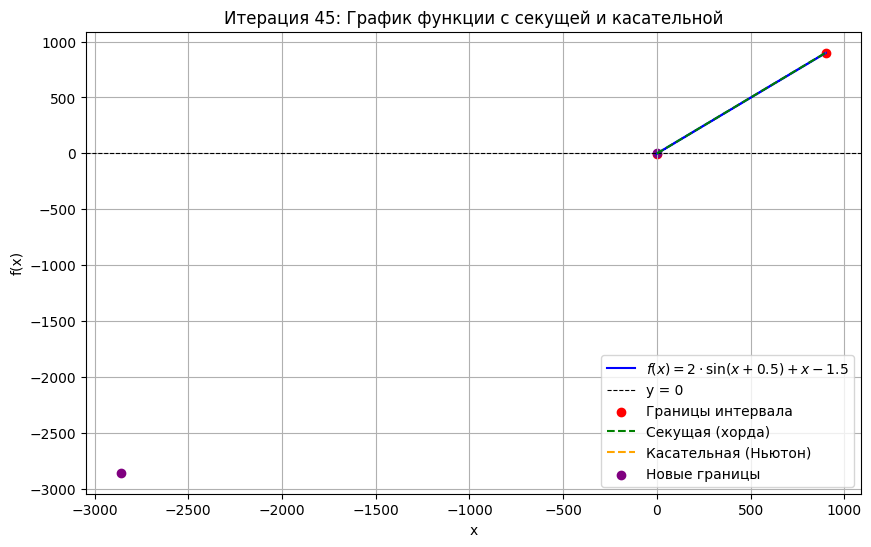

Итерация 46: a = -0.333226, b = 7298.735354, |b - a| = 7299.068581


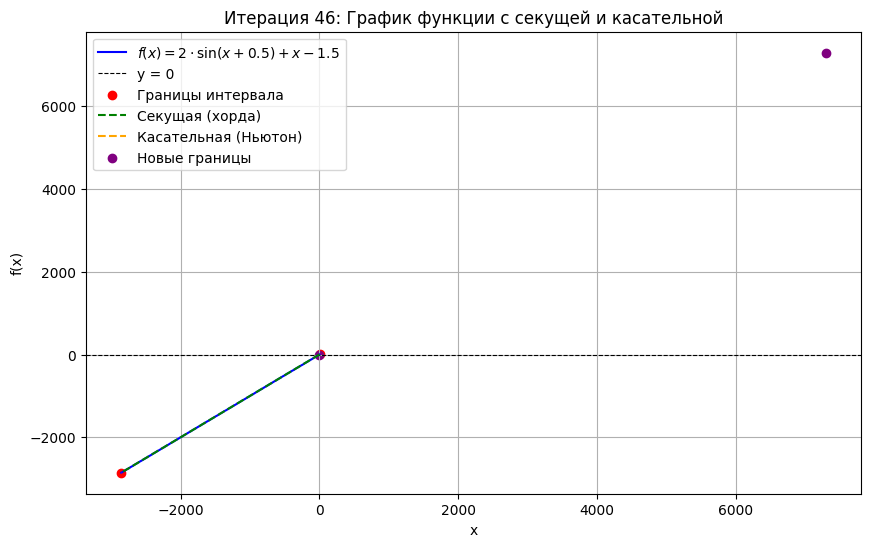

Итерация 47: a = 1.168463, b = -7434.242453, |b - a| = 7435.410916


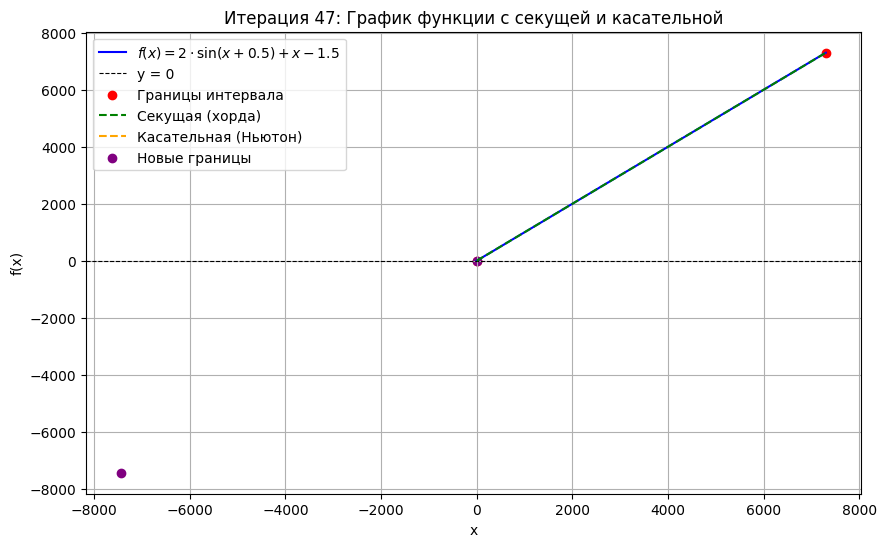

Итерация 48: a = -0.489726, b = -4441.075870, |b - a| = 4440.586144


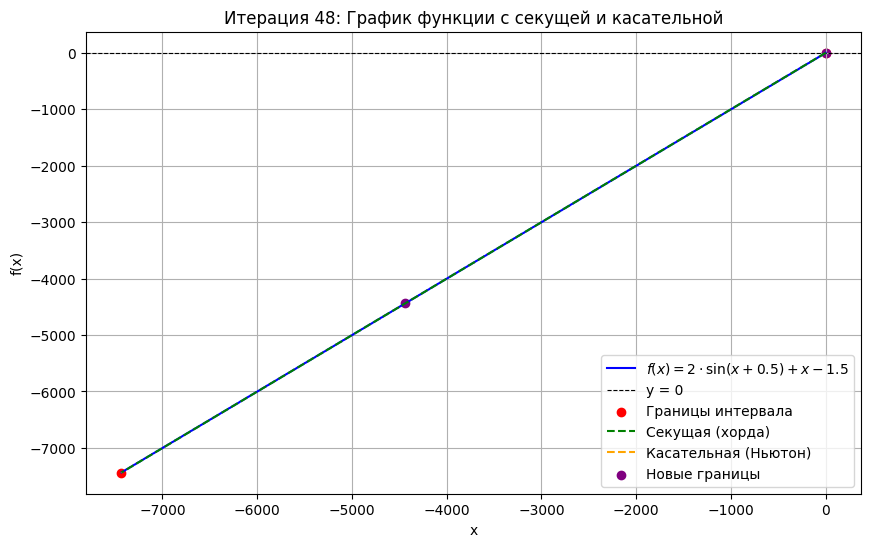

Итерация 49: a = 1.480329, b = 666.552047, |b - a| = 665.071718


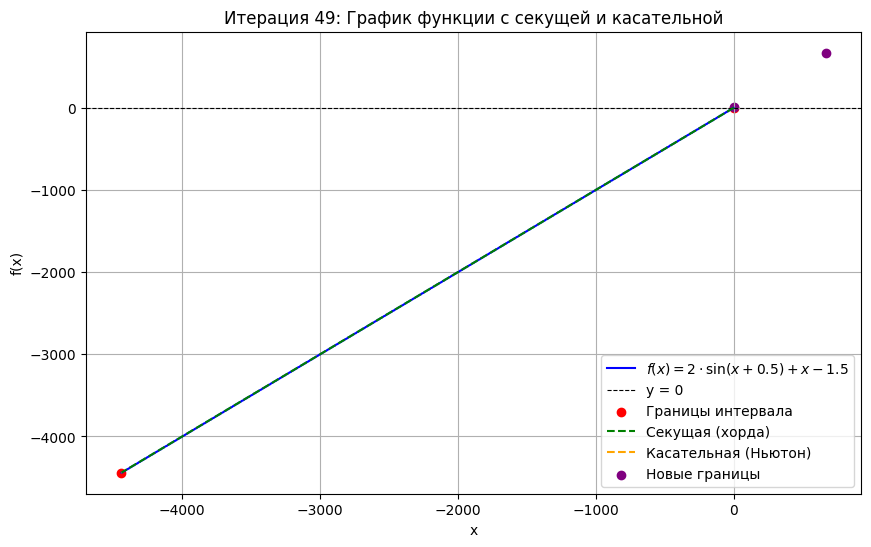

Итерация 50: a = -0.334929, b = 336.806277, |b - a| = 337.141207


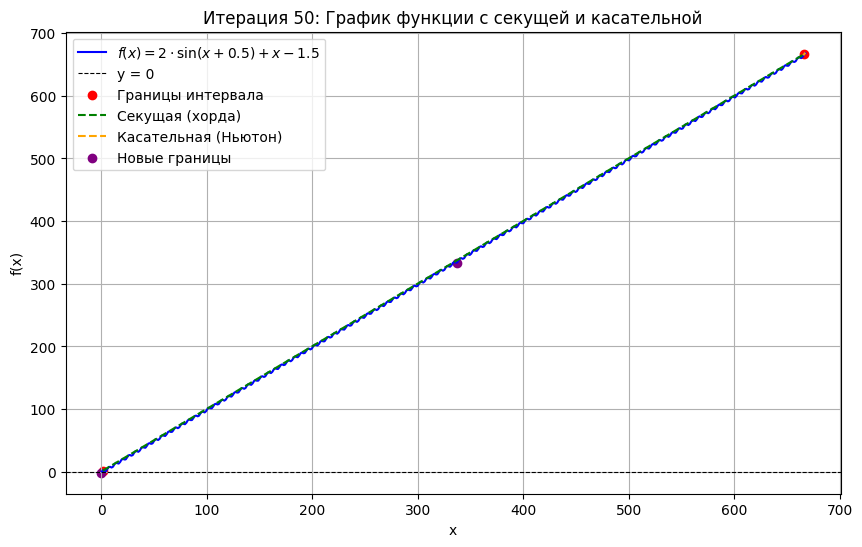

Итерация 51: a = 1.181064, b = -1384.426852, |b - a| = 1385.607916


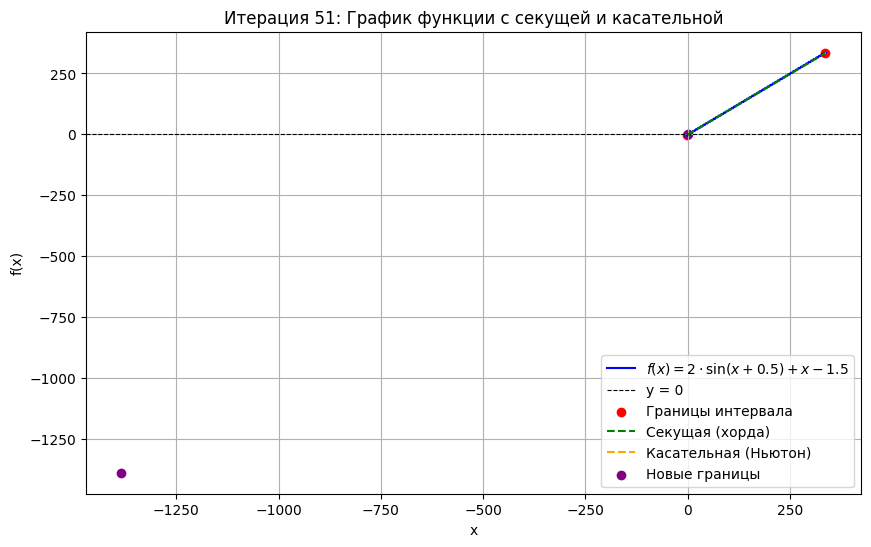

Итерация 52: a = -0.483068, b = 175.950557, |b - a| = 176.433625


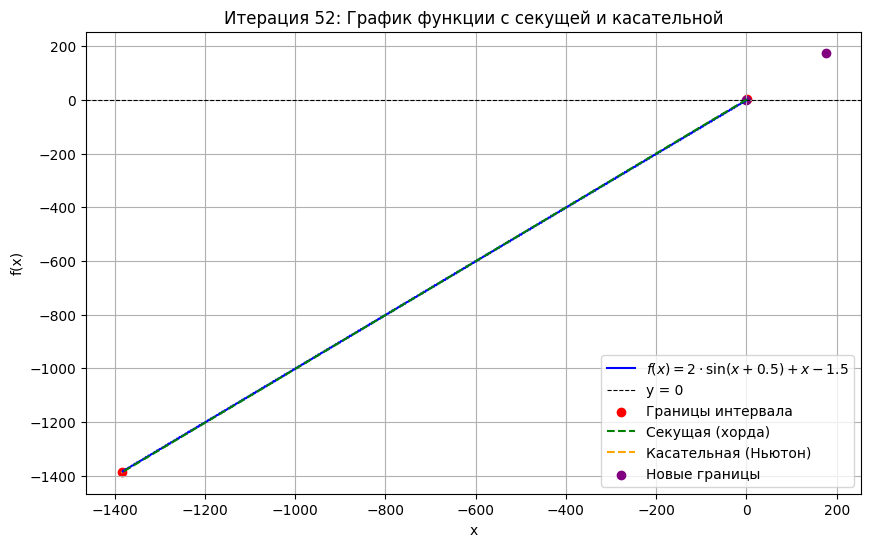

Итерация 53: a = 1.455563, b = 111.784882, |b - a| = 110.329318


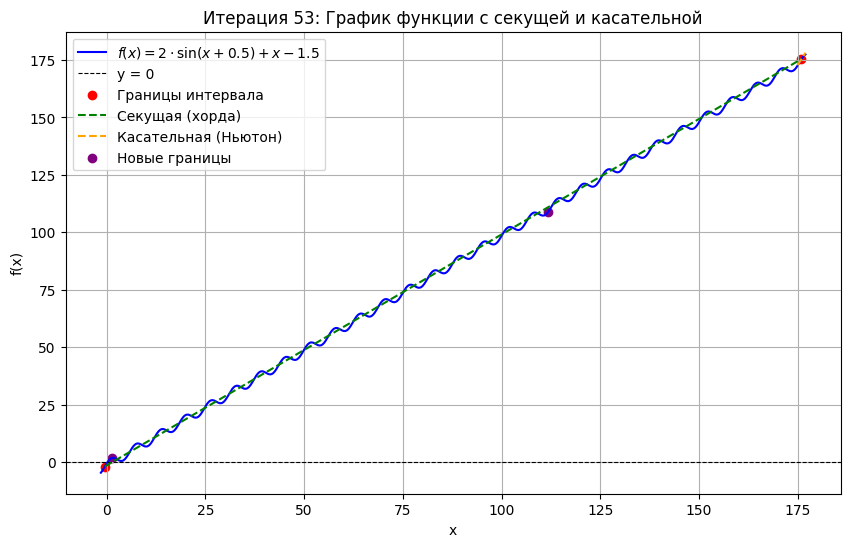

Итерация 54: a = -0.409658, b = 65.968939, |b - a| = 66.378598


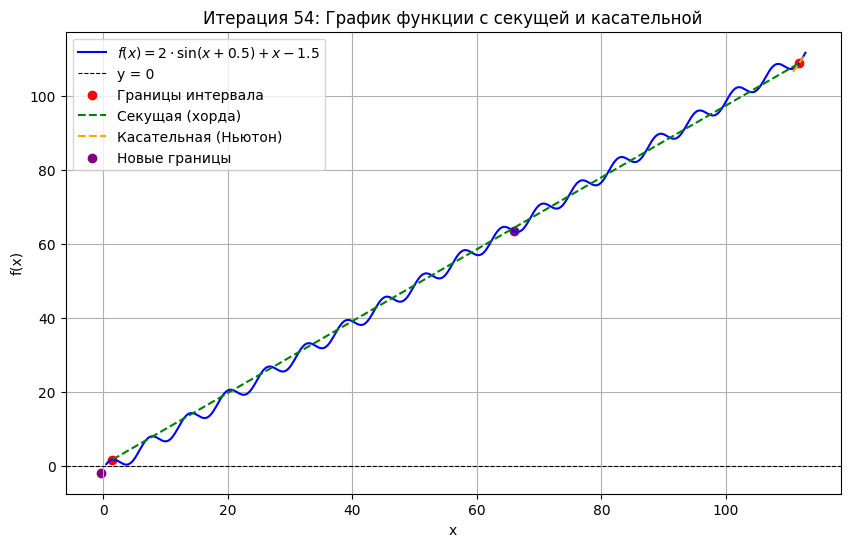

Итерация 55: a = 1.349546, b = 149.603799, |b - a| = 148.254253


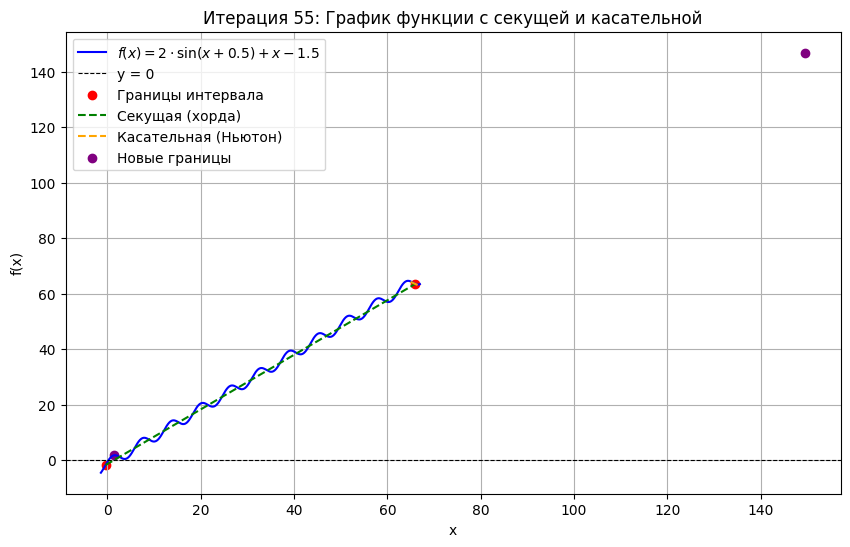

Итерация 56: a = -0.461899, b = 91.777889, |b - a| = 92.239788


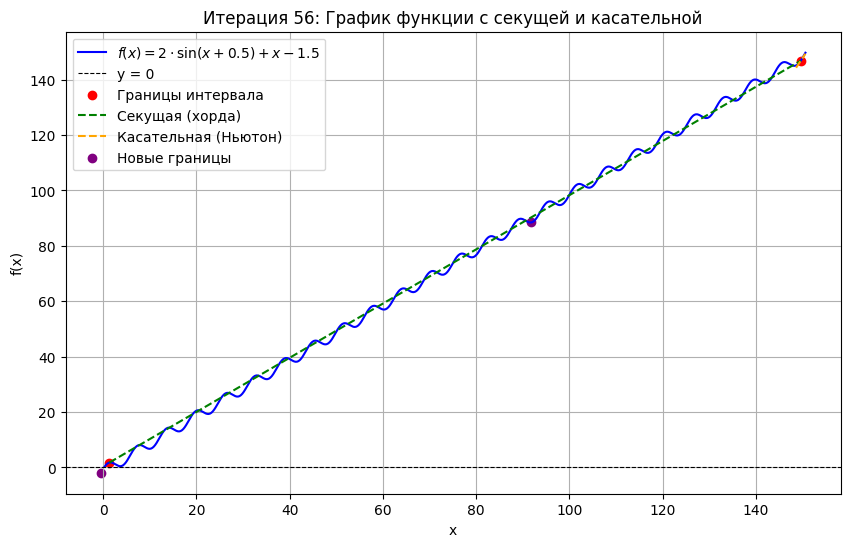

Итерация 57: a = 1.463881, b = -305.091037, |b - a| = 306.554919


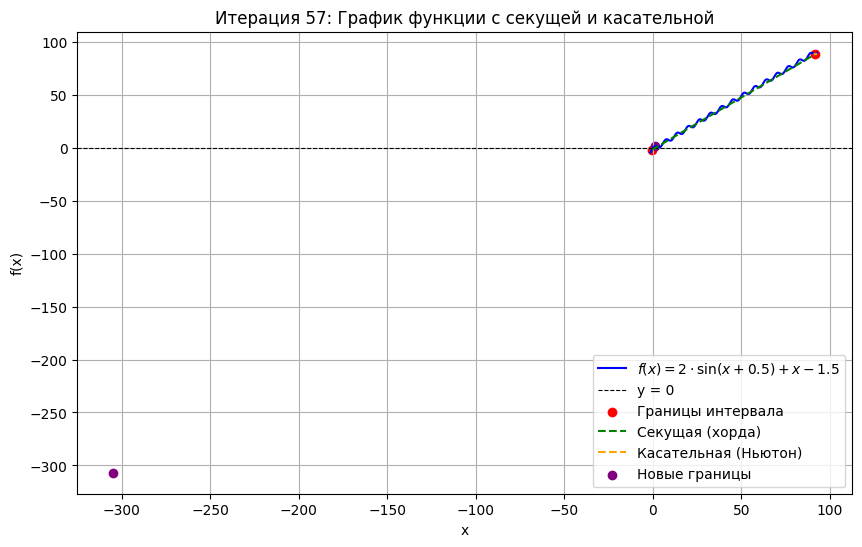

Итерация 58: a = -0.334945, b = -618.404272, |b - a| = 618.069327


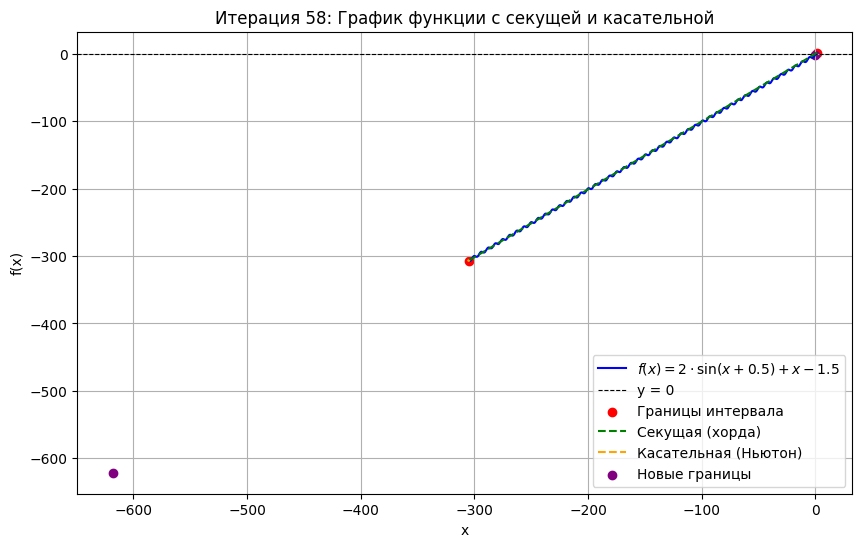

Итерация 59: a = 1.166528, b = -6945.024403, |b - a| = 6946.190932


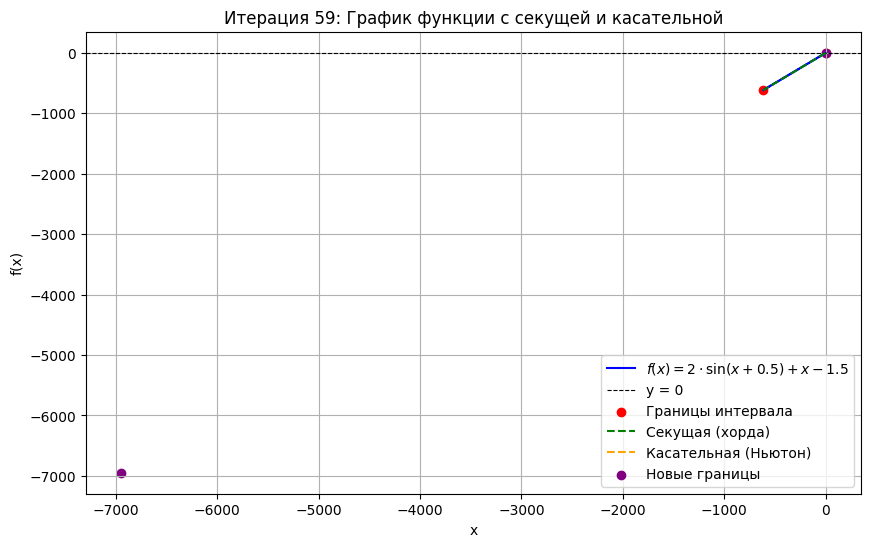

Итерация 60: a = -0.489891, b = 507.854037, |b - a| = 508.343928


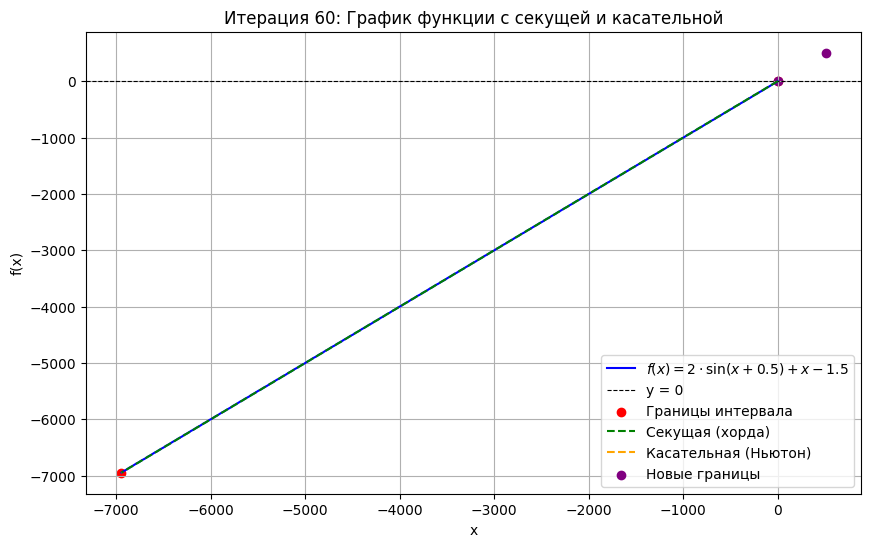

Итерация 61: a = 1.484143, b = 318.519075, |b - a| = 317.034932


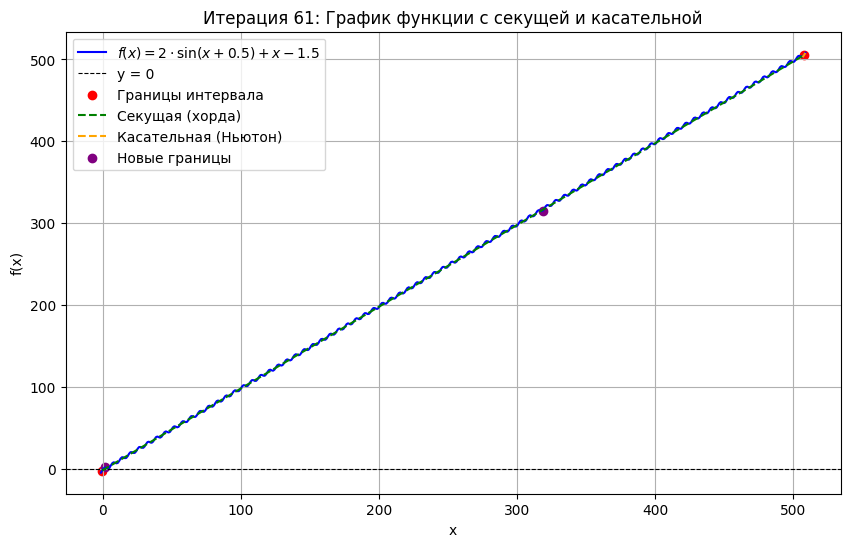

Итерация 62: a = -0.353649, b = 75.014040, |b - a| = 75.367688


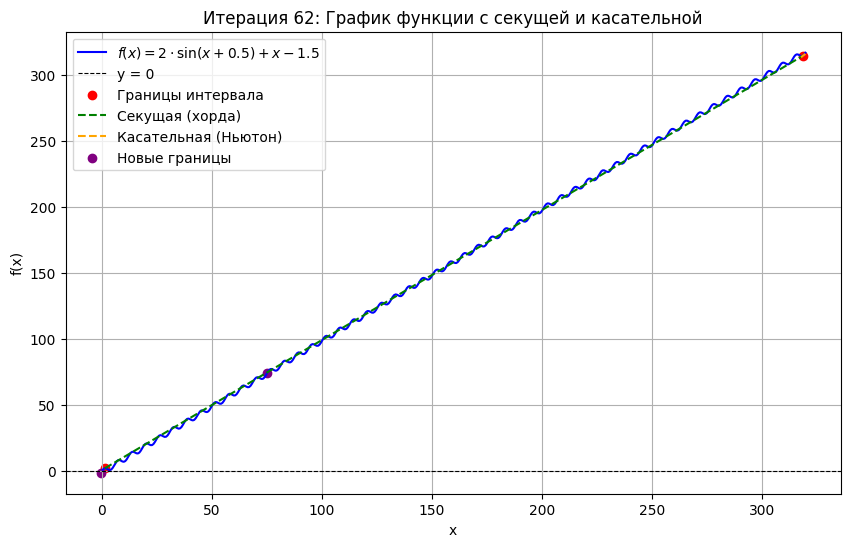

Итерация 63: a = 1.209597, b = 50.322044, |b - a| = 49.112448


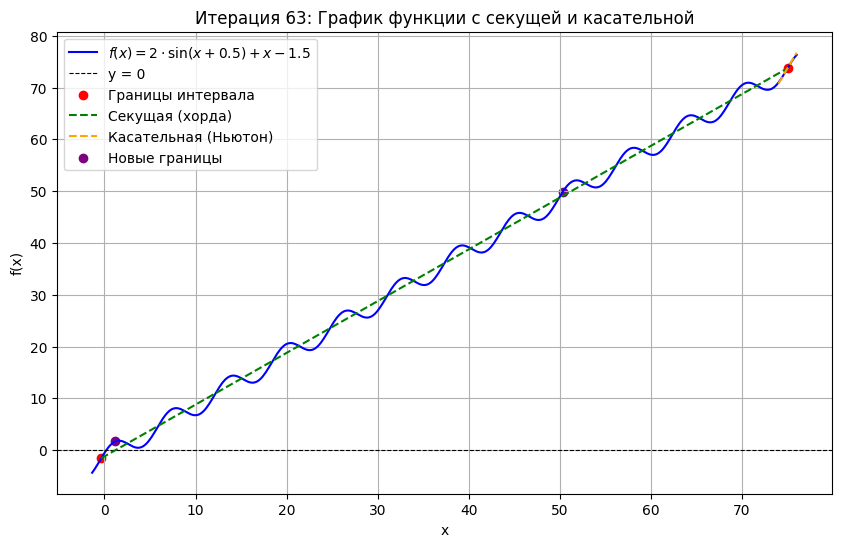

Итерация 64: a = -0.513186, b = 31.835847, |b - a| = 32.349033


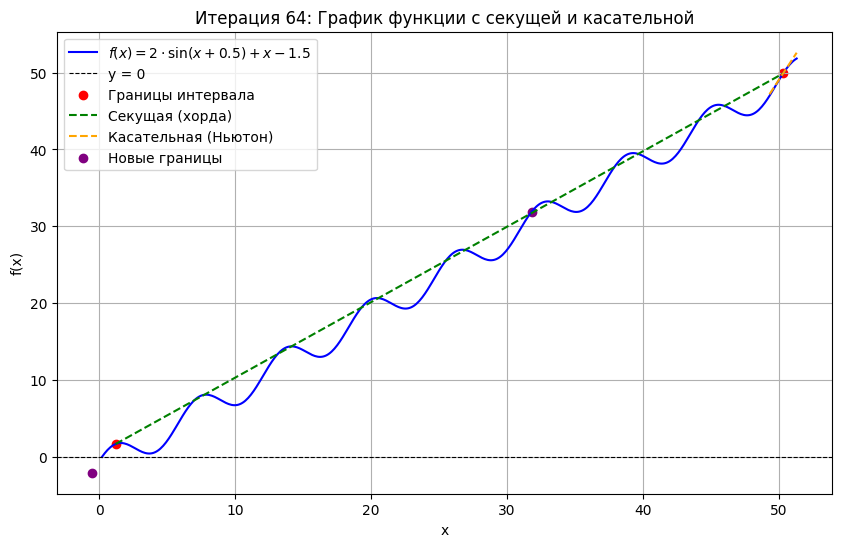

Итерация 65: a = 1.429247, b = 17.400803, |b - a| = 15.971556


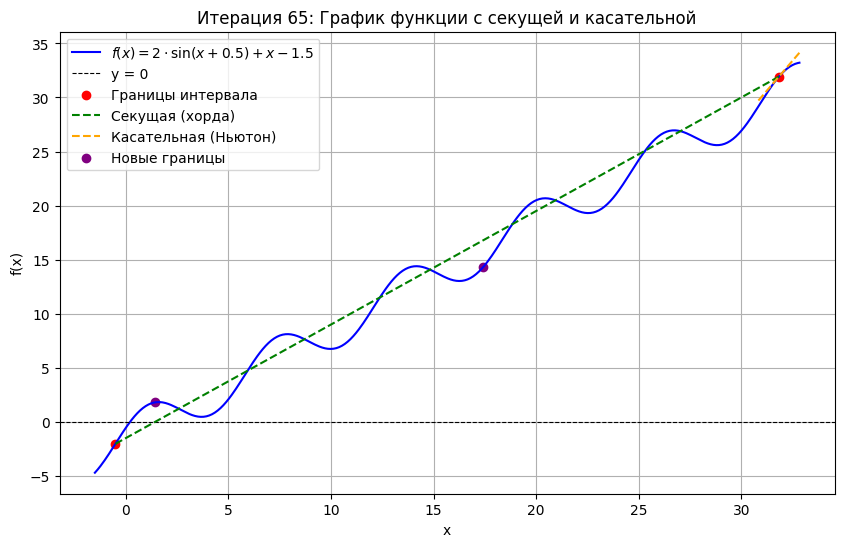

Итерация 66: a = -0.878308, b = 10.808273, |b - a| = 11.686582


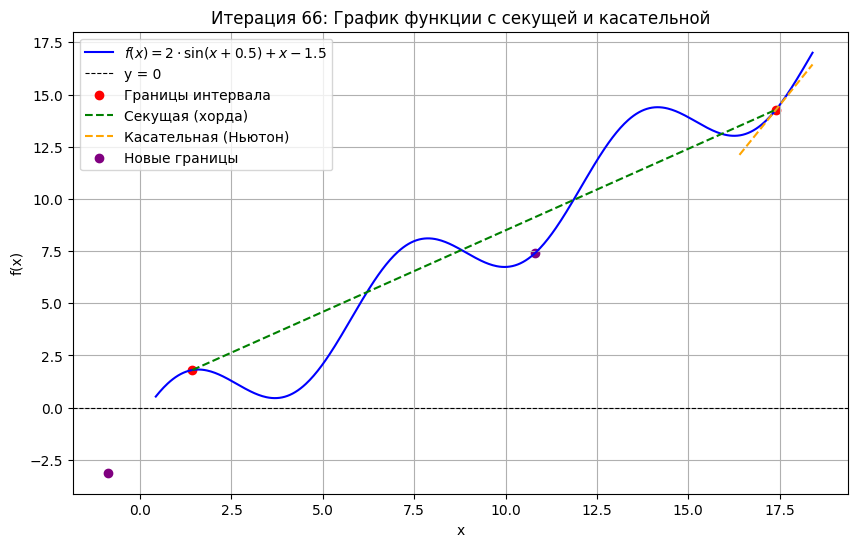

Итерация 67: a = 2.583603, b = 6.223700, |b - a| = 3.640097


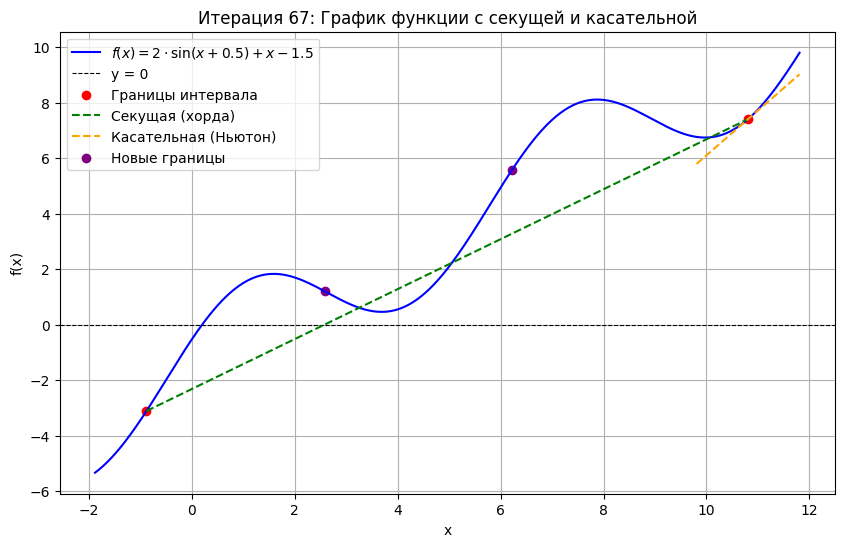

Итерация 68: a = 1.586032, b = 4.238516, |b - a| = 2.652485


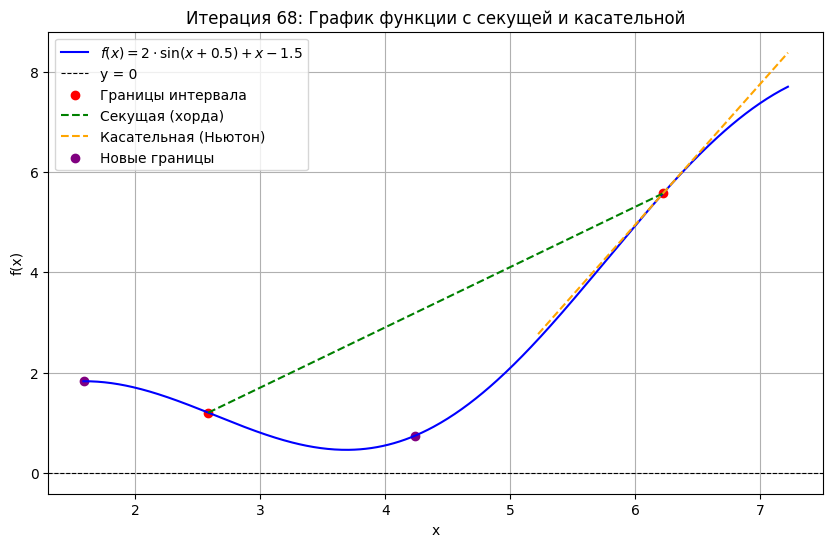

Итерация 69: a = 6.041990, b = 3.536022, |b - a| = 2.505969


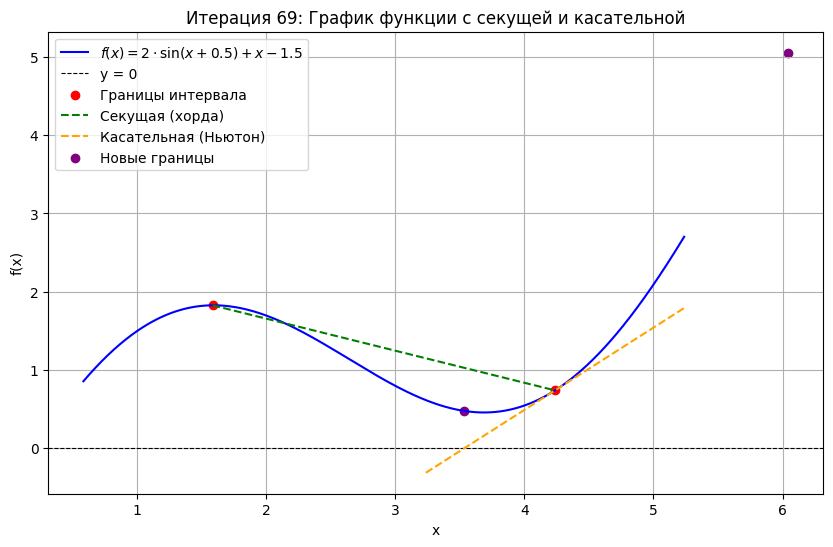

Итерация 70: a = 3.275261, b = 5.426708, |b - a| = 2.151447


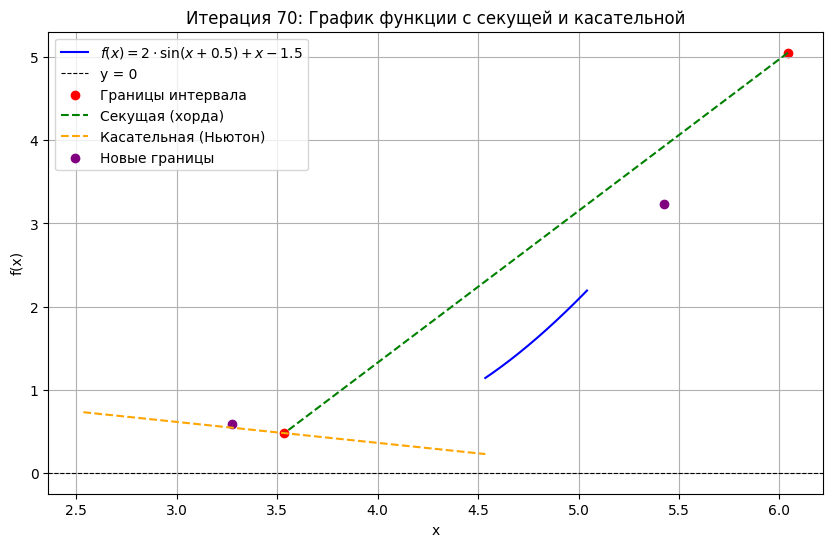

Итерация 71: a = 2.793169, b = 4.303374, |b - a| = 1.510205


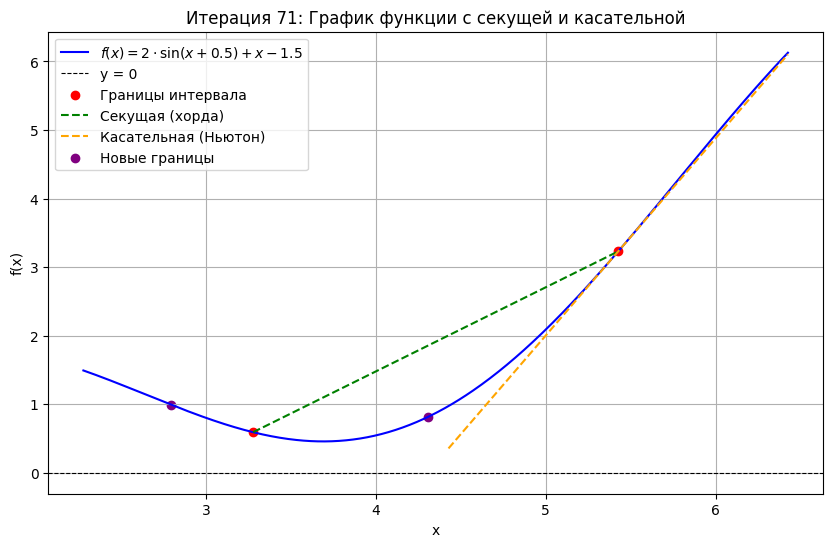

Итерация 72: a = 11.130999, b = 3.616539, |b - a| = 7.514460


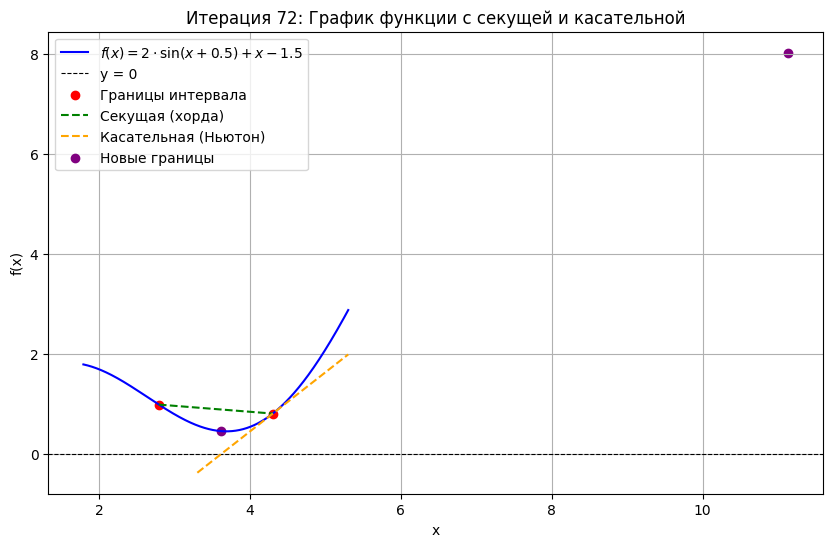

Итерация 73: a = 3.158132, b = 7.383704, |b - a| = 4.225572


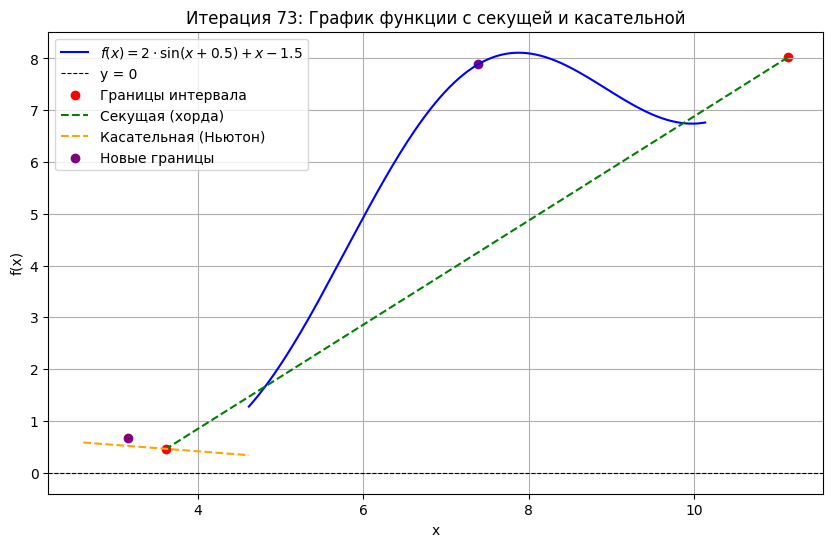

Итерация 74: a = 2.765371, b = -0.997244, |b - a| = 3.762615


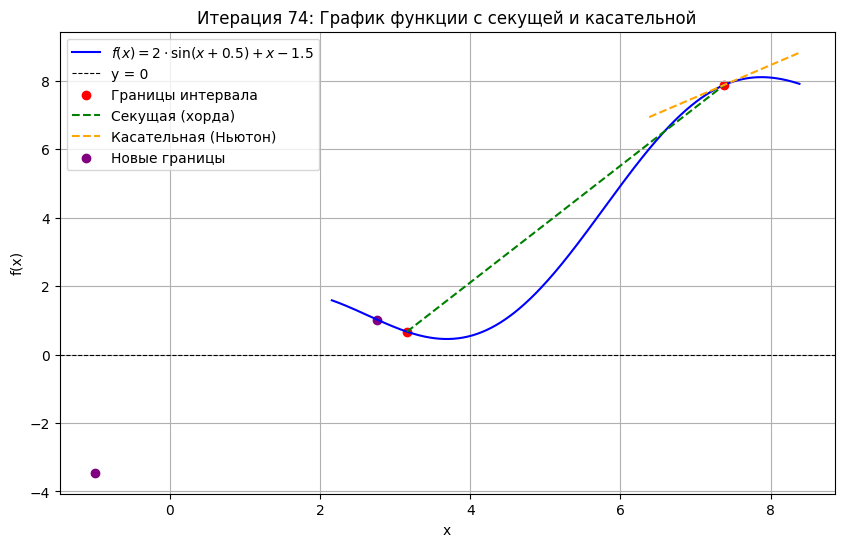

Итерация 75: a = 1.908039, b = 0.254208, |b - a| = 1.653831


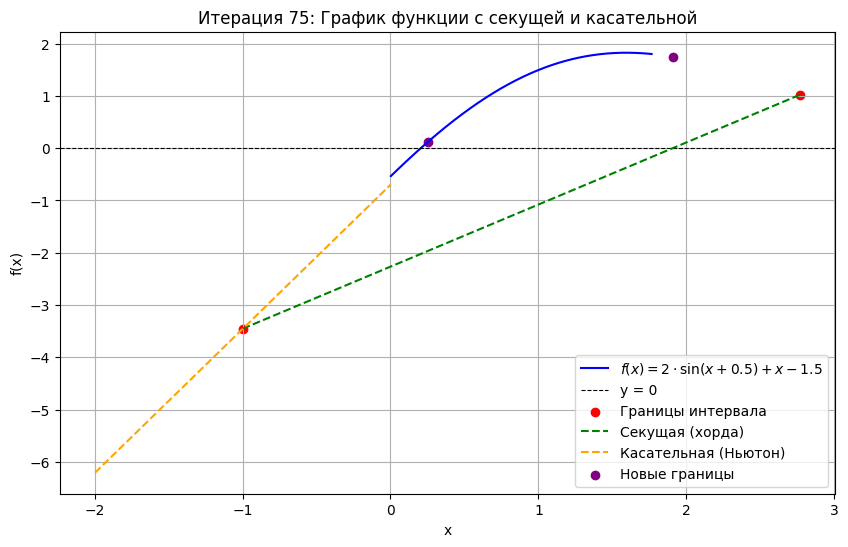

Итерация 76: a = 0.128263, b = 0.203903, |b - a| = 0.075640


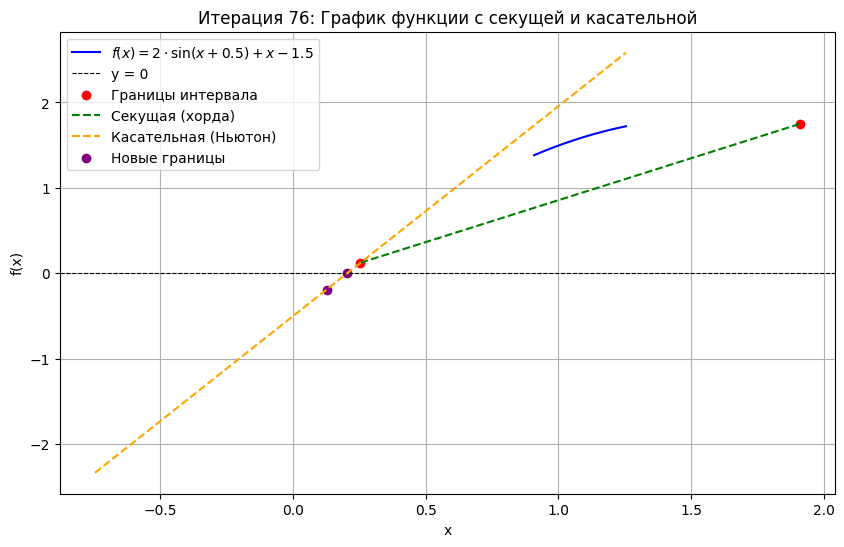

Итерация 77: a = 0.204564, b = 0.204577, |b - a| = 0.000012


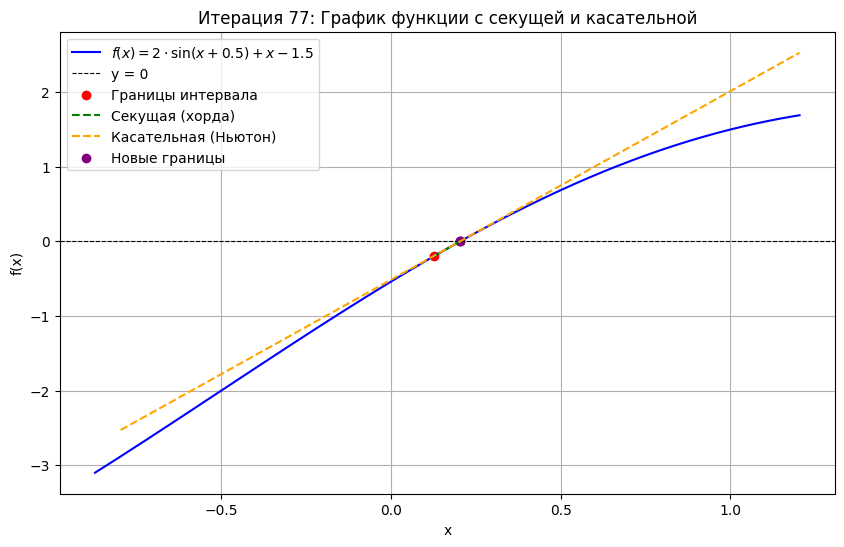


Корень уравнения: 0.204571


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию f(x)
def f(x):
    return 2 * np.sin(x + 0.5) + x - 1.5

# Определяем производную функции f'(x)
def df(x):
    return 2 * np.cos(x + 0.5) + 1

# Функция для построения графика на каждой итерации
def plot_iteration(a, b, a_new, b_new, iteration):
    """
    Строит график функции f(x) с текущими границами интервала,
    секущей (метод хорд) и касательной (метод Ньютона).

    :param a: Текущая левая граница
    :param b: Текущая правая граница
    :param a_new: Новая левая граница (метод хорд)
    :param b_new: Новая правая граница (метод Ньютона)
    :param iteration: Номер итерации
    """
    x = np.linspace(a - 1, b + 1, 500)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=r"$f(x) = 2 \cdot \sin(x + 0.5) + x - 1.5$", color="blue")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--", label="y = 0")

    # Отображаем текущие границы интервала
    plt.scatter([a, b], [f(a), f(b)], color="red", label="Границы интервала")
    
    # Отображаем секущую (метод хорд)
    plt.plot([a, b], [f(a), f(b)], color="green", linestyle="--", label="Секущая (хорда)")
    
    # Отображаем касательную (метод Ньютона)
    tangent_x = np.linspace(b - 1, b + 1, 100)
    tangent_y = f(b) + df(b) * (tangent_x - b)
    plt.plot(tangent_x, tangent_y, color="orange", linestyle="--", label="Касательная (Ньютон)")

    # Отображаем новые границы интервала
    plt.scatter([a_new, b_new], [f(a_new), f(b_new)], color="purple", label="Новые границы")

    plt.title(f"Итерация {iteration}: График функции с секущей и касательной")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Комбинированный метод хорд и касательных
def combined_method(a, b, tol):
    """
    Комбинированный метод хорд и касательных.

    :param a: Начало интервала
    :param b: Конец интервала
    :param tol: Точность
    :return: Приближенное значение корня
    """
    # Проверка изменения знака
    if f(a) * f(b) >= 0:
        raise ValueError("Функция должна менять знак на интервале [a, b].")

    # Проверка производной
    if df(a) == 0 or df(b) == 0:
        raise ValueError("Производная равна нулю на границах интервала.")

    print("Начинаем комбинированный метод хорд и касательных:")
    iteration = 0
    while abs(b - a) > tol:
        # Метод хорд (обновление левой границы)
        a_new = a - f(a) * (b - a) / (f(b) - f(a))
        
        # Метод касательных (обновление правой границы)
        b_new = b - f(b) / df(b)
        
        # Вывод отчета по текущей итерации
        print(f"Итерация {iteration}: a = {a_new:.6f}, b = {b_new:.6f}, |b - a| = {abs(b_new - a_new):.6f}")
        
        # Строим график для текущей итерации
        plot_iteration(a, b, a_new, b_new, iteration)
        
        # Обновляем границы интервала
        a, b = a_new, b_new
        iteration += 1

    # Возвращаем среднее значение между границами как корень
    root = (a + b) / 2
    return root

# Ввод данных пользователем
try:
    a = float(input("Введите начало интервала (a): "))
    b = float(input("Введите конец интервала (b): "))
    tol = float(input("Введите точность (например, 0.0001): "))

    # Проверка, что точность положительна
    if tol <= 0:
        raise ValueError("Точность должна быть положительным числом.")

    # Находим корень
    root = combined_method(a, b, tol)
    print(f"\nКорень уравнения: {root:.6f}")
except ValueError as e:
    print(f"Ошибка: {e}")